# CZ1015 Mini-Project Group 2 (FSP 2)
### Goals
- (Main) Predict earthquake damage of the test data using the train data.
- Identify which type of each categorical column is more vulnerable to damage from earthquake, hence attempting to characterise the variables.
- Using the resuts from the test data, we attempt to verify our hypothesis.

### List of Questions we ask
- What is the most common damage grade?
- Does any variables given (column fields) correlate more than others to damage grade?
    - If so, are they good predictors for damage grade?
- Which superstructure type are more/less resilient to damage?

One-hot encoding on categorical columns ()
Pair plot
Random Forest
F1 score
Identify Important/Key variables

land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: <b>n, o, t</b>.</br>

foundation_type (type: categorical): type of foundation used while building. Possible values: <b>h, i, r, u, w</b>.</br>

roof_type (type: categorical): type of roof used while building. Possible values: <b>n, q, x</b>.</br>

ground_floor_type (type: categorical): type of the ground floor. Possible values: <b>f, m, v, x, z</b>.</br>

other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: <b>j, q, s, x</b>.</br>

position (type: categorical): position of the building. Possible values: <b>j, o, s, t</b>.</br>

plan_configuration (type: categorical): building plan configuration. Possible values: <b>a, c, d, f, m, n, o, q, s, u</b>.

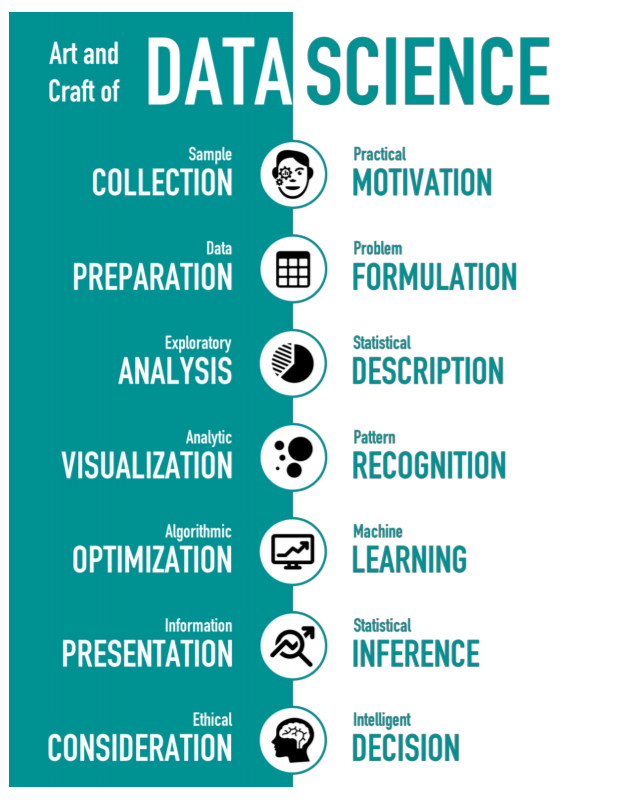


### Others
- Any way to come up with a data visualization or table of sorts to verify if data is confirmed to be cleaned?

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from IPython.core.display import display, HTML
sb.set() # set the default Seaborn style for graphics
pd.set_option('display.max_columns', None)

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Initialize Data varaiables
test_values = pd.read_csv("Earthquake Data/test_values.csv")
train_labels = pd.read_csv("Earthquake Data/train_labels.csv")
train_values = pd.read_csv("Earthquake Data/train_values.csv")
combined_df = pd.merge(train_values, train_labels, on = "building_id")

## Statistical Description

In [3]:
test_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [5]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
combined_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [3]:
combined_df_num = pd.DataFrame(combined_df.iloc[:,4:8])
count_fam_df = pd.DataFrame(combined_df['count_families'])
combined_df_num = pd.concat([combined_df_num,count_fam_df],axis = 1).reindex()
combined_df_num.describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.129723,26.535029,8.018051,5.434365,0.983949
std,0.727665,73.565937,4.392231,1.918418,0.418389
min,1.000000,0.000000,1.000000,2.000000,0.000000
25%,2.000000,10.000000,5.000000,4.000000,1.000000
50%,2.000000,15.000000,7.000000,5.000000,1.000000
75%,2.000000,30.000000,9.000000,6.000000,1.000000
max,9.000000,995.000000,100.000000,32.000000,9.000000


Miscelleneous Data Description

In [5]:
combined_df_cat = combined_df.drop(combined_df.iloc[:,4:8],axis = 1)
combined_df_cat = combined_df_cat.drop(['building_id'],axis = 1)
combined_df_cat = combined_df_cat.astype("category")
combined_df_cat.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
unique,31,1414,11595,3,5,3,5,4,4,10,2,2,2,2,2,2,2,2,2,2,2,4,10,2,2,2,2,2,2,2,2,2,2,2,3
top,6,39,633,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
freq,24381,4038,651,216757,219196,182842,209619,165282,202090,250072,237500,198561,251654,255849,242840,240986,194151,238447,249502,256468,256696,250939,226115,231445,243824,251838,258490,260356,260507,260322,260552,260563,260578,259267,148259


In [8]:
# checking the types of varibles in the dataset(int,float,object)
train = combined_df
dtypes = pd.DataFrame(train.dtypes,columns = ["Data Type"])
dtypes["Unique Values"] = train.nunique()
dtypes["Null Values"] = train.isnull().sum()
dtypes["% null Values"] = train.isnull().sum() / len(train)
dtypes.style.background_gradient(cmap = 'Set2',axis = 0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


---

In [9]:
%%html
<style>table {margin-left: 0 !important;}</style>

## Data Preparation
We transform categorical columns and their values using One-hot encoding.

Each unique value in each categorical column now have their own column with column-name suffix of their respective unique values. 

| Columns                  | Unique Values |
|:------------------------ |:-------------:|
| land_surface_condition   | n, o, t       |
| land_surface_condition_n | 1, 0          | 
| land_surface_condition_o | 1, 0          |
| land_surface_condition_t | 1, 0          |

These columns have values of 1 or 0 which represents whether that row belongs to that category or not.

<b>TODO</b>: Identify why we are not using geo level via visualization or verbal explanation.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Creates new One-hot DataFrame Object
one_hot_df = train_values.iloc[:,0:26]
# one_hot_df = train_values.iloc[:,0:25]
# one_hot_df=one_hot_df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id','plan_configuration'],axis=1)


for column in one_hot_df:
    column_type = one_hot_df[column].dtype
    if column_type == "object":
        # Creates list of unique values belonging to each category column.
        category_values = sorted(one_hot_df[column].unique()) 

        # Print unique category values to confirm sorting order. 
        print(category_values)

        # OneHotEncoder Initialization
        ohe = OneHotEncoder();

        #Transform data using OneHotEncoder
        X = ohe.fit_transform(one_hot_df[column].values.reshape(-1, 1)).toarray()

        # Initialize new DataFrame object with one-hot columns
        temp_df = pd.DataFrame(X, columns = [column + "_" + unique_val for unique_val in category_values])

        # Concat Combined DataFrame with the new One-hot DataFrame
        one_hot_df = pd.concat([one_hot_df, temp_df], axis=1)


['n', 'o', 't']
['h', 'i', 'r', 'u', 'w']
['n', 'q', 'x']
['f', 'm', 'v', 'x', 'z']
['j', 'q', 's', 'x']
['j', 'o', 's', 't']
['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u']


In [11]:
one_hot_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
categorical_columns = combined_df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [13]:
# Increase in accuracy
# one_hot_df = one_hot_df.drop(['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 'other_floor_type', 'position','building_id'],axis=1)
# one_hot_df
one_hot_df = one_hot_df.drop(['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 'other_floor_type', 'position','building_id','plan_configuration'],axis=1)
one_hot_df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


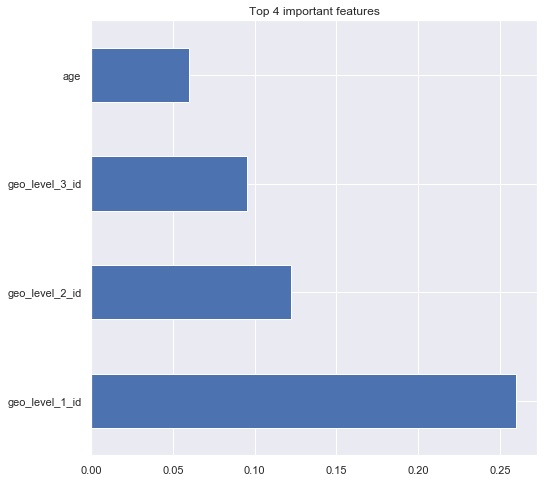

In [52]:
X_train, X_test, y_train, y_test = get_train_test_split()
y_pred, rf_model = random_forest(X_train, y_train, 1, show_charts = False, show_stats = False)
plt.figure(figsize = (8, 8))
plt.title("Top 4 important features")
feat_importances = pd.Series(rf_model.feature_importances_, index = one_hot_df.columns)
feat_importances.nlargest(4).plot(kind = "barh")

Here, we identify the top 4 most important columns for our predictive models using the random forest attribute of feature importances.

---
## Exploratory Analysis
Here, we can identify the number of buildings categorized into the 3 damage scales.

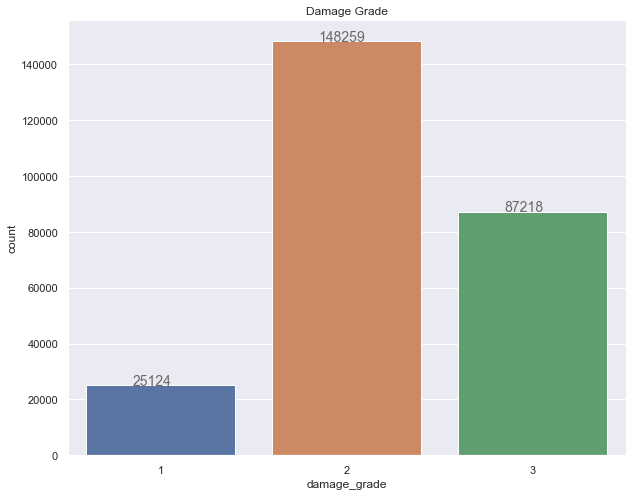

In [14]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize = (10, 8))
ax = sb.countplot("damage_grade", data = train_labels)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + 0.25, i.get_height() + 5, \
            str(round((i.get_height()), 2)), fontsize = 14, color = 'dimgrey')
plt.title("Damage Grade")
plt.show()

Through the bar plot below we can identify some points regarding the amount of damage a building would take with regards to its age.

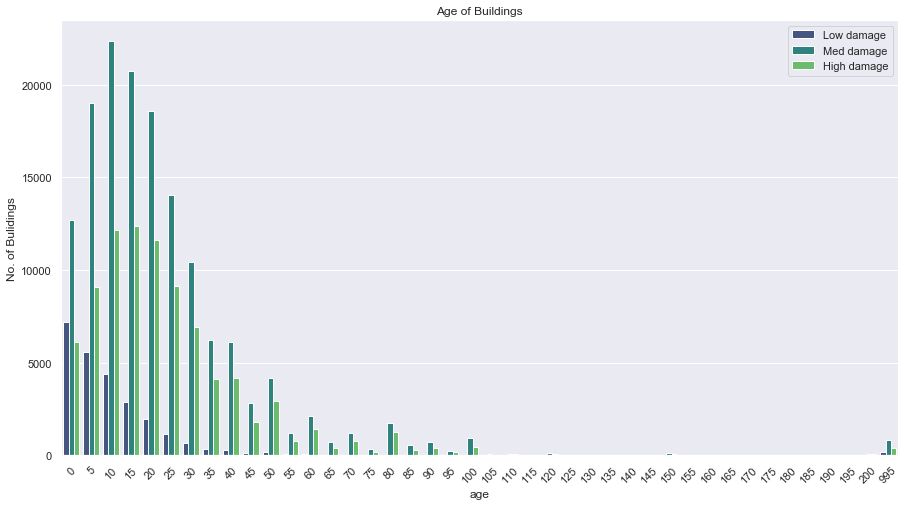

In [15]:
plt.figure(figsize=(15,8))
sb.countplot(x=train["age"],hue=train["damage_grade"],palette="viridis")
plt.ylabel("No. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Med damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

We then plot the numerical columns to observe the spread. 

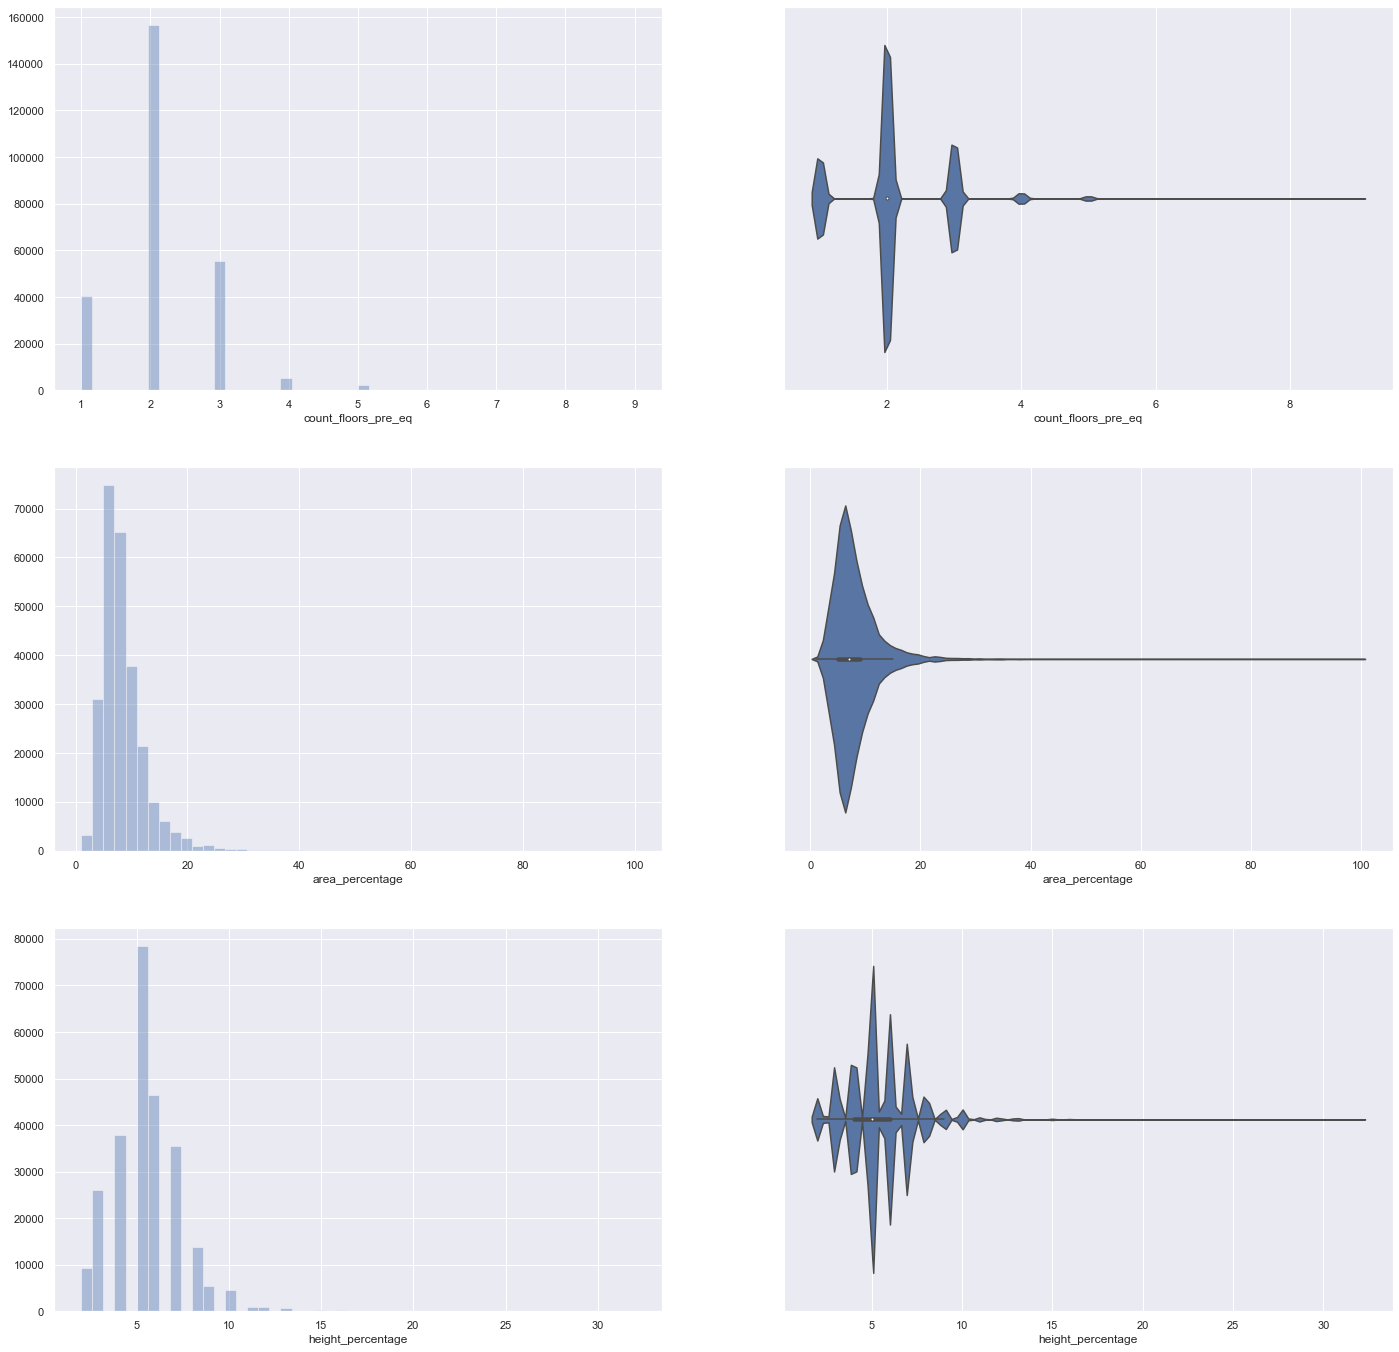

In [18]:
f,axes = plt.subplots(3, 2, figsize=(24,24))

# numerical_columns = ["count_floors_pre_eq", "area_percentage", "height_percentage"]
# count = 0
# sb.swarmplot(x = combined_df["count_floors_pre_eq"], y = combined-df["damage_grade_category"], data = combined_df, orient = "h")
numerical_columns = pd.DataFrame(train_values[['count_floors_pre_eq','area_percentage','height_percentage']])
count = 0
for column in numerical_columns:
    sb.distplot(numerical_columns[column], kde=False, ax=axes[count, 0])
    sb.violinplot(numerical_columns[column], kde=False, ax=axes[count, 1])
    count += 1

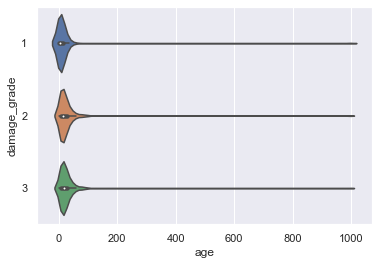

In [19]:
sb.violinplot(x = "age", y = "damage_grade", data = combined_df, orient = "h")

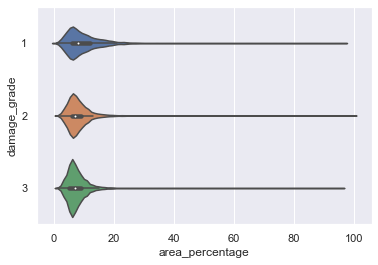

In [20]:
sb.violinplot(x = "area_percentage", y = "damage_grade", data = combined_df, orient = "h")

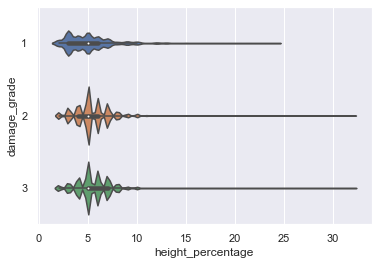

In [21]:
sb.violinplot(x = "height_percentage", y = "damage_grade", data = combined_df, orient = "h")

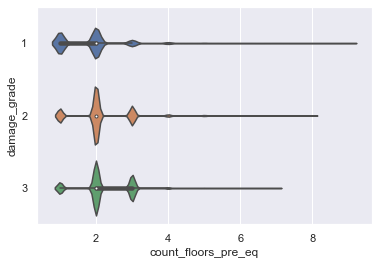

In [22]:
sb.violinplot(x = "count_floors_pre_eq", y = "damage_grade", data = combined_df, orient = "h")

---
### Analysis on Super Structure
Which type of super structure or building material took the least to most amoutns of damage?

In [23]:
# List containing the names of all super structure types
super_structure_list = ["has_superstructure_adobe_mud", 
                        "has_superstructure_mud_mortar_stone", 
                        "has_superstructure_stone_flag", 
                        "has_superstructure_cement_mortar_stone", 
                        "has_superstructure_mud_mortar_brick", 
                        "has_superstructure_cement_mortar_brick", 
                        "has_superstructure_timber", 
                        "has_superstructure_bamboo", 
                        "has_superstructure_rc_non_engineered", 
                        "has_superstructure_rc_engineered", 
                        "has_superstructure_other"]

super_structure_df = {
    "building_id": [],
    "super_structure_type": [],
    "damage_grade": []
}

# Creates a list where each row is an occurence of a super structure type.
# All super structure types that a building has, will be added to the list as an individual row.
# I.e. if a building has flag value 1 for has_superstructure_cement_mortar_brick and has_superstructure_bamboo flags,
# both super structure types will be appended to the super_structure_df list.
def create_super_structure_list():
    is_found = False
    for index, row in combined_df.iterrows():
        building_id = row["building_id"]
        for super_structure in super_structure_list:
            if row[super_structure] == 1:
                is_found = True
                super_structure_df["super_structure_type"].append(super_structure[19:].replace("_", " ").capitalize())
                super_structure_df["building_id"].append(building_id)
                super_structure_df["damage_grade"].append(row["damage_grade"])
        if not is_found:
            super_structure_df["super_structure_type"].append("has_superstructure_other")
            super_structure_df["building_id"].append(building_id)
            super_structure_df["damage_grade"].append(row["damage_grade"])
        is_found = False   
    return super_structure_df

super_structure_df = pd.DataFrame(create_super_structure_list())

Now we verify that the count of super structure actually matches row count return from the count_super_structure_types function.

In [24]:
total = 0
for super_structure in super_structure_list:
    total += combined_df[super_structure].value_counts()[1]

total == super_structure_df.count()

building_id             True
super_structure_type    True
damage_grade            True
dtype: bool

As it turns out, our algorithm works as expected!

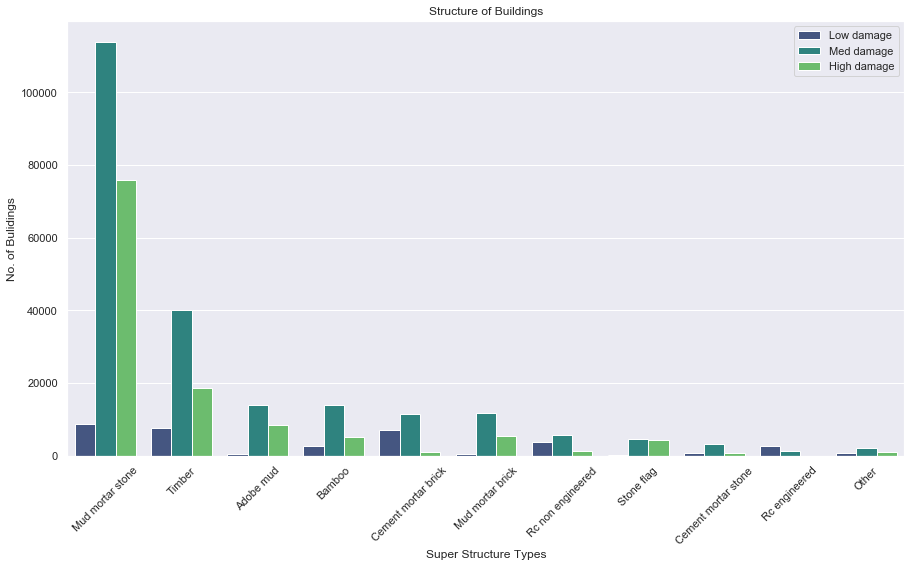

In [25]:
plt.figure(figsize = (15,8))
sb.countplot(x = super_structure_df["super_structure_type"], 
             hue = super_structure_df["damage_grade"], palette = "viridis",
             order = super_structure_df["super_structure_type"].value_counts().index)
plt.ylabel("No. of Bulidings")
plt.xlabel("Super Structure Types")
plt.title("Structure of Buildings")
plt.legend(["Low damage", "Med damage", "High damage"], loc = "upper right")
plt.xticks(rotation = 45)
plt.show()

It looks like majority of buildings in the earthquake region were made with mud mortar stone for its super structure.

In [26]:
def create_dmg_grade_heatmap(column_name, is_super_structure = True, figsize = (15, 15)):
    f, axes = plt.subplots(1, 1, figsize = figsize)
    sb.heatmap(combined_df.groupby(["damage_grade", column_name])
               .size().unstack(), linewidths = 1,annot = True,
               annot_kws = {"size":18}, cmap = "BuGn", fmt = 'g')
    axes.set_ylabel("Damage Grade", fontsize = 16)     
    axes.set_xlabel(column_name[19 if is_super_structure else 0:].replace("_", " ").capitalize(), fontsize = 16)
    axes.yaxis.set_ticklabels(["Low", "Medium", "High"], fontsize = 12)
    if is_super_structure:
        axes.xaxis.set_ticklabels(["No", "Yes"], fontsize = 12)

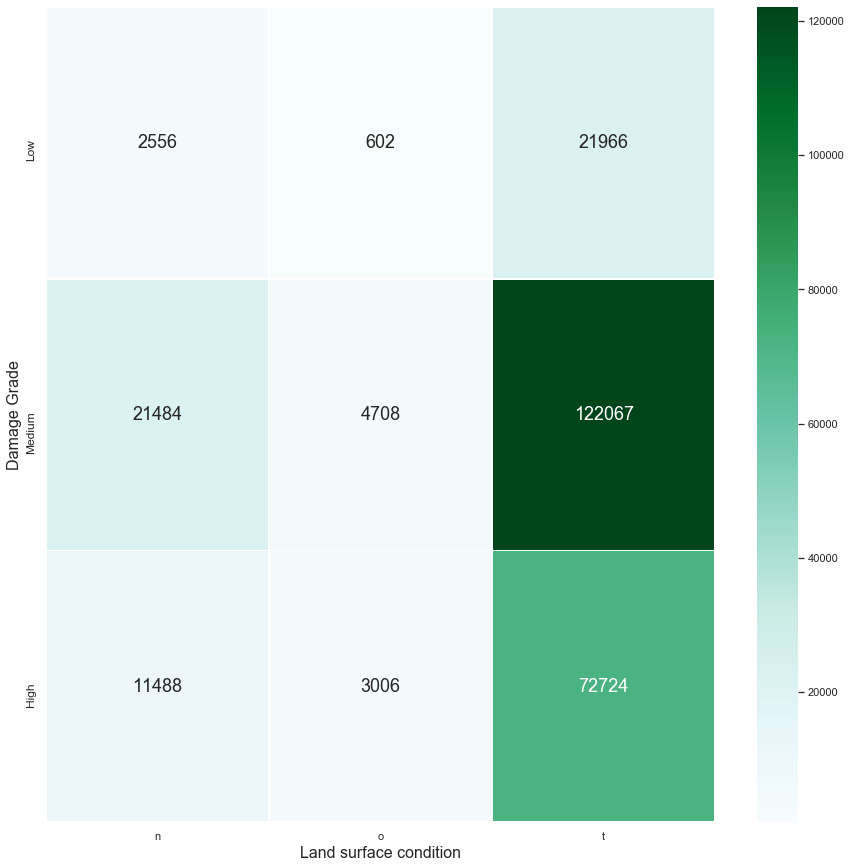

In [27]:
create_dmg_grade_heatmap("land_surface_condition", False)

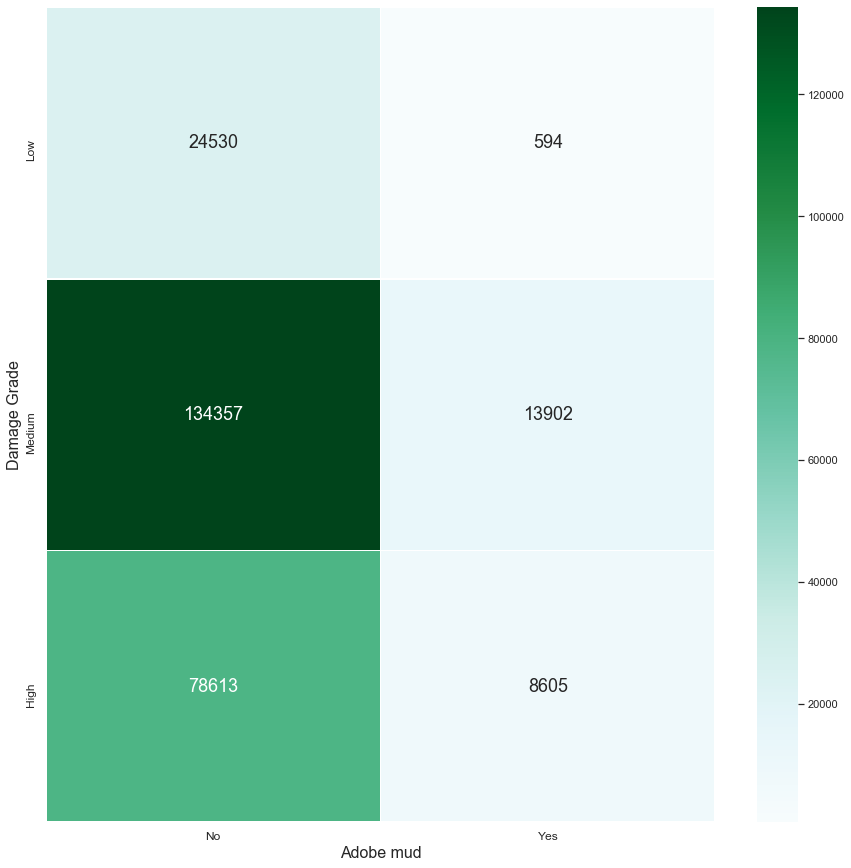

In [28]:
create_dmg_grade_heatmap("has_superstructure_adobe_mud")

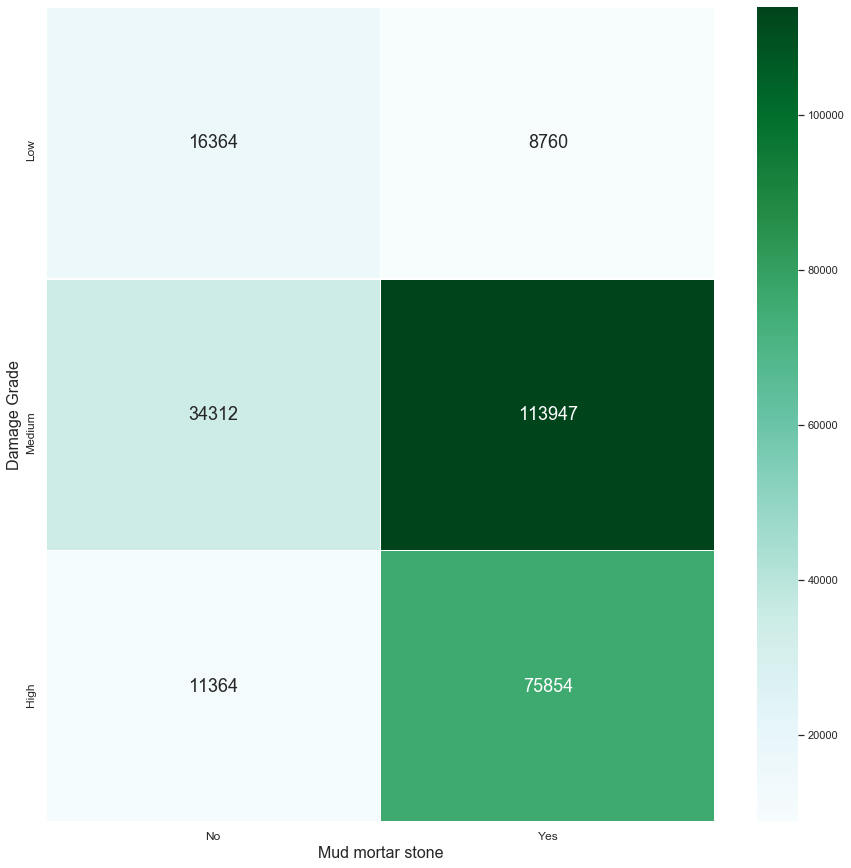

In [29]:
create_dmg_grade_heatmap("has_superstructure_mud_mortar_stone")

Even though overall, most houses have this structure, majority of the houses sustaining damage grade 1 do not have this structure. It's even greater than the number of houses without this structure and sustaining damage grade 3. Can possibly conclude that houses having this structure might be vulnerable to higher damage.

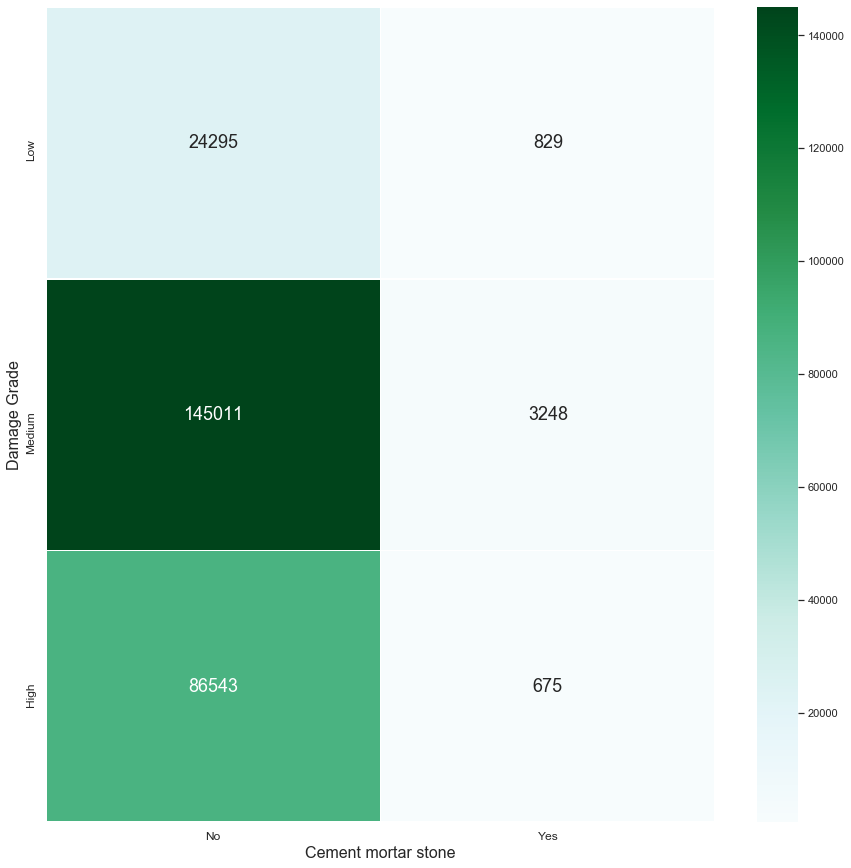

In [30]:
create_dmg_grade_heatmap("has_superstructure_cement_mortar_stone")

The number of houses sustaining damage grade 3 is greater than that of damage grade 1.Out of 260601 houses,255849 of them do not have this structure.Despite such an imbalance,The number of houses without this structure and having damage grade 1 is greater than that of those with this structure and sustaining damage grade 3. Can possibly conclude that houses with this structure might sustain lesser damage.

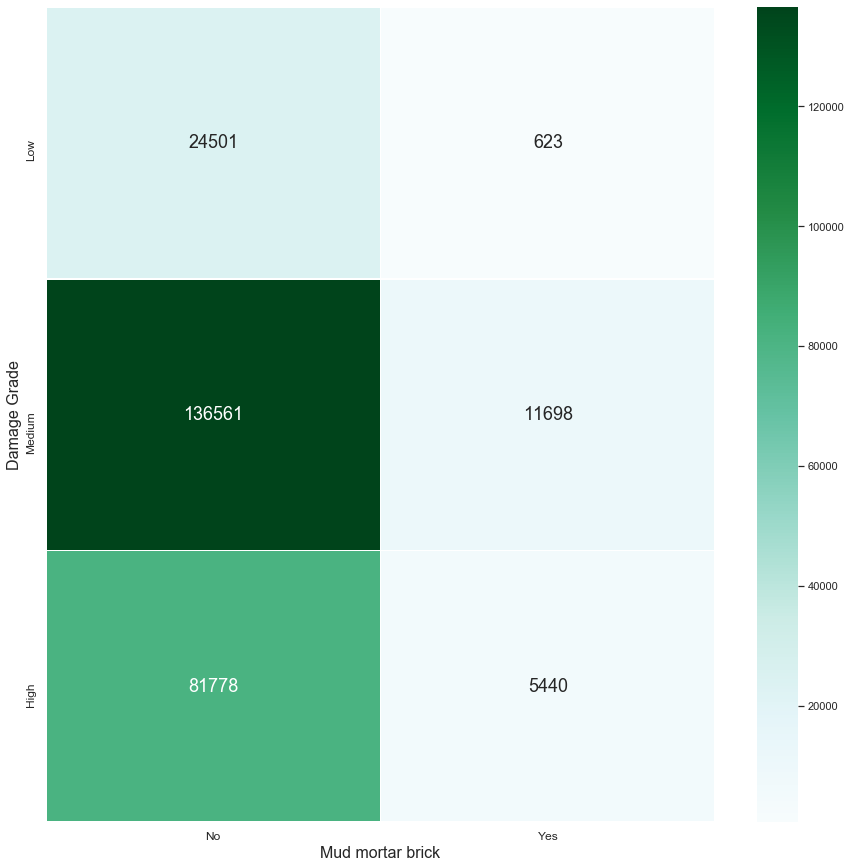

In [31]:
create_dmg_grade_heatmap("has_superstructure_mud_mortar_brick")

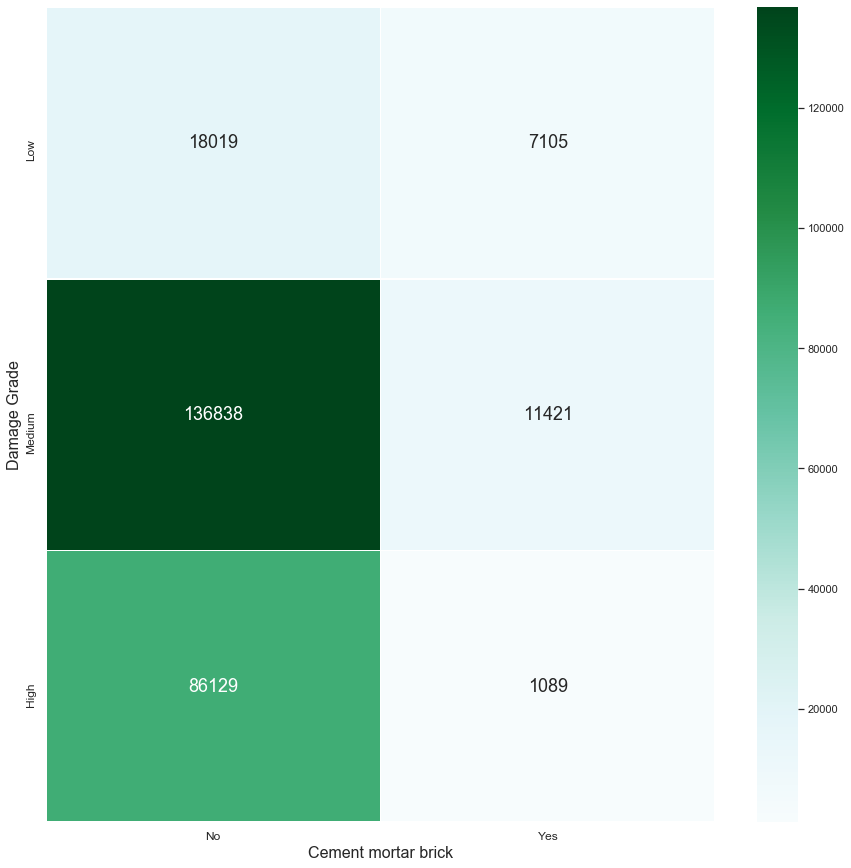

In [32]:
create_dmg_grade_heatmap("has_superstructure_cement_mortar_brick")

The number of houses sustaining damage grade 3 is greater than that of damage grade 1.Out of 260601 houses,255849 of them do not have this structure.Despite such an imbalance,The number of houses without this structure and having damage grade 1 is greater than that of those with this structure and sustaining damage grade 3. Can conclude that houses with this structure might be susceptible to lesser damage.

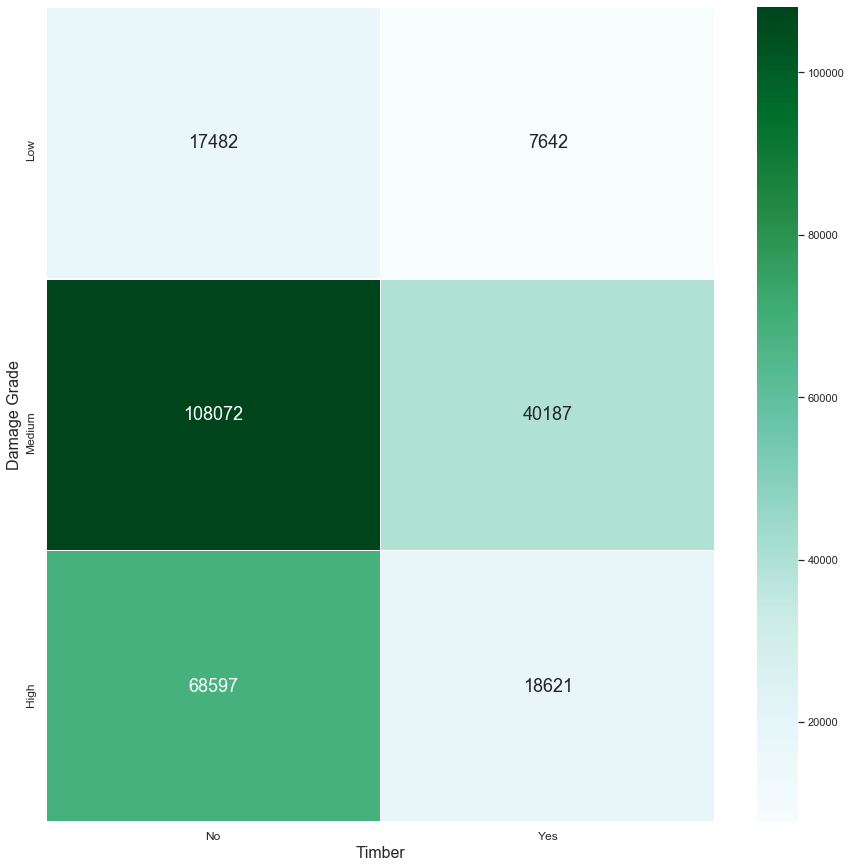

In [33]:
create_dmg_grade_heatmap("has_superstructure_timber")

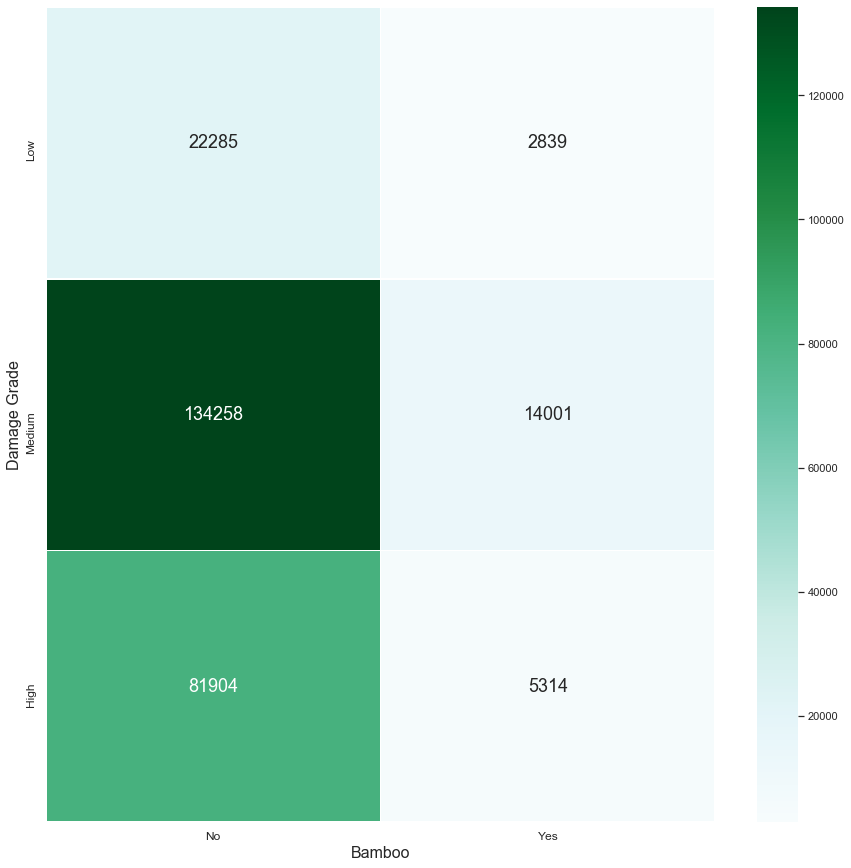

In [34]:
create_dmg_grade_heatmap("has_superstructure_bamboo")

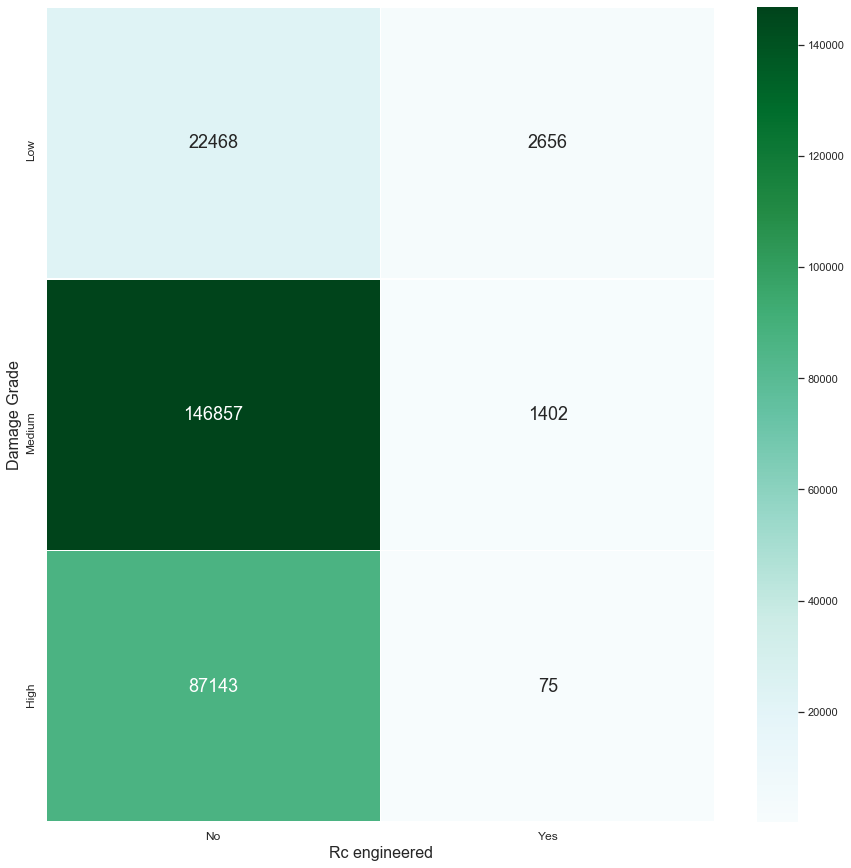

In [35]:
create_dmg_grade_heatmap("has_superstructure_rc_engineered")

Out of 260601 houses  256468 of them do not have this structure.Out of the houses that have this structure,surprisingly most of them have damage grade 1,followed by damaage grade 2 and a mere 75 of them have sustained damage grade 3. Can possibly conclude that houses with this structure might be vulnerable to lesser damage.

Note: Rc stands for Reinforced concrete

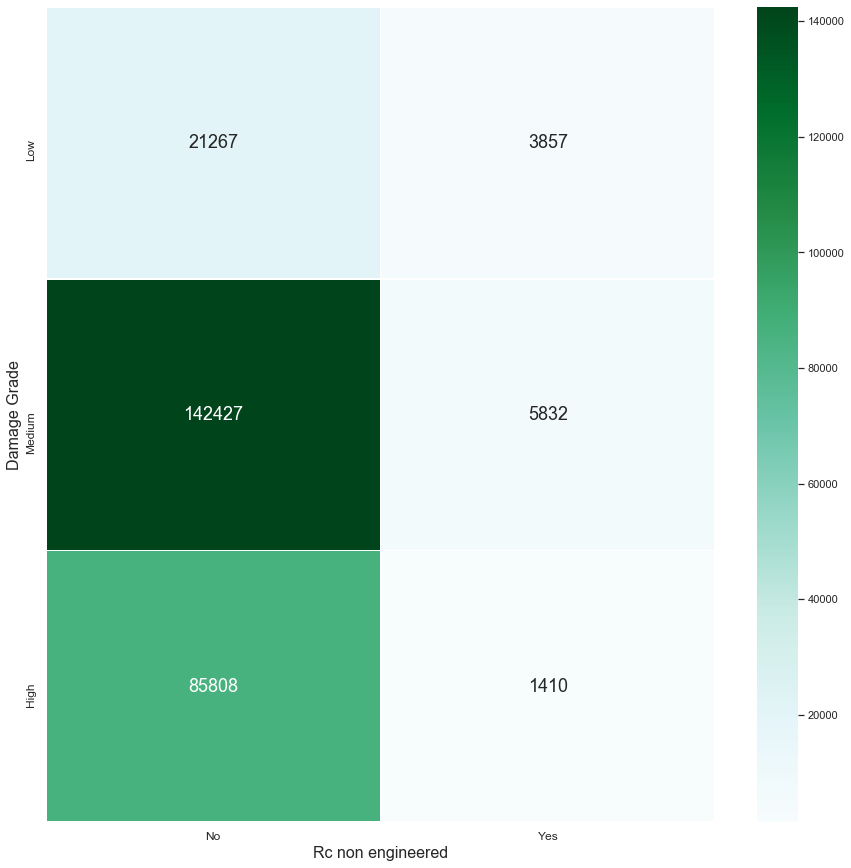

In [36]:
create_dmg_grade_heatmap("has_superstructure_rc_non_engineered")

Out of 260601 houses  249502 of them do not have this structure.Out of the houses that have this structure,the number of houses having damage grade 1 are grater than the number of houses having damage grade 3. Can possibly conclude that houses with this structure might have lesser damage.

Note: Rc stands for Reinforced concrete

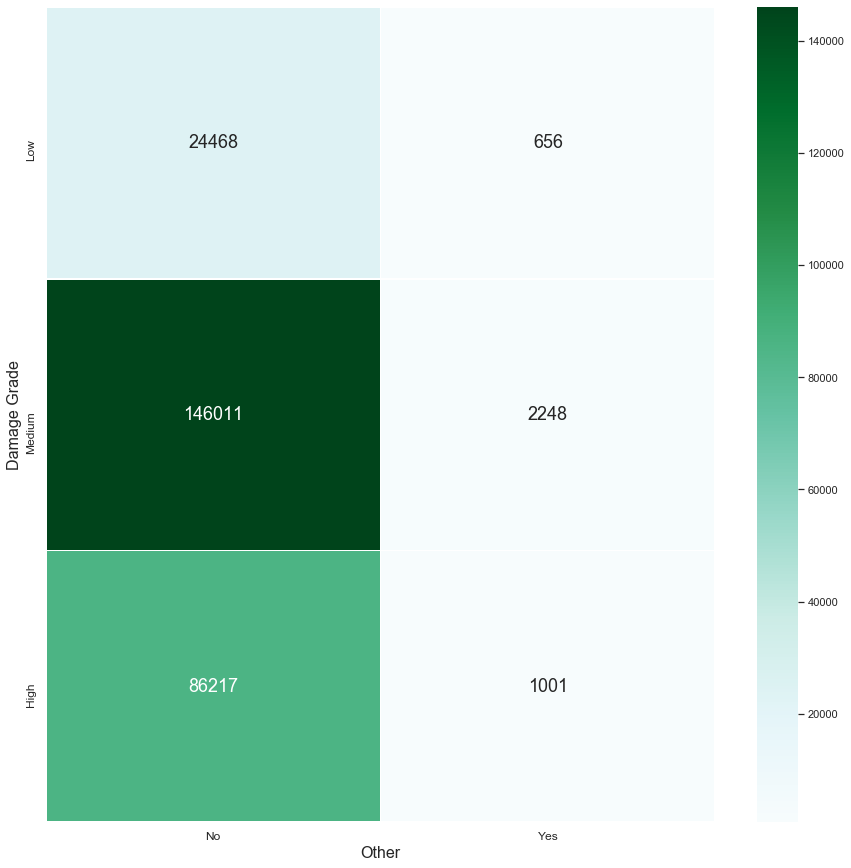

In [37]:
create_dmg_grade_heatmap("has_superstructure_other")

The number of houses sustaining damage grade 3 is greater than that of damage grade 1. Out of 260601 houses,255849 of them do not have this structure.Despite such an imbalance,The number of houses without this structure and having damage grade 1 is greater than that of those with this structure and sustaining damage grade 3. Can conclude that maybe houses with this structure sustain lesser damage.

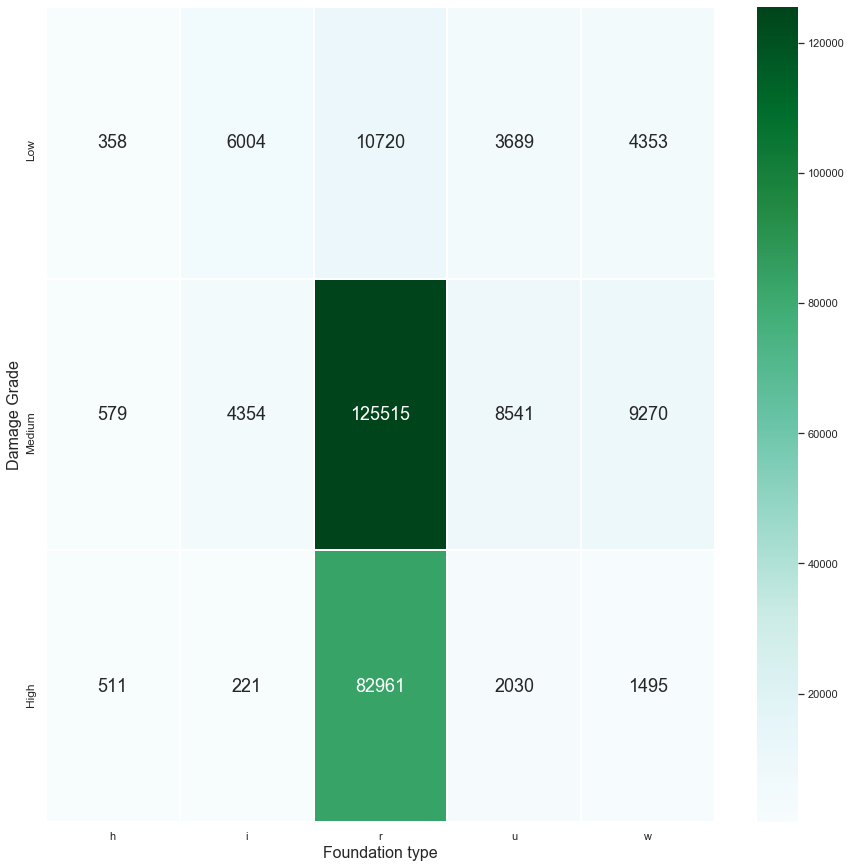

In [38]:
create_dmg_grade_heatmap("foundation_type", False)

Among the buildings with floor type 'i', a large proportion of them are of damage grade 1,followed by damage grade 2 and then damage grade 3. for types 'u' and 'w', while buildings with damage grade 2 take a large chunk,the number of ones with damage grade 1 are greater than that of those with damage grade 3. 'i','u' and 'w' seem to be less vulnerable to earthquake damage with 'i' being the most favourable

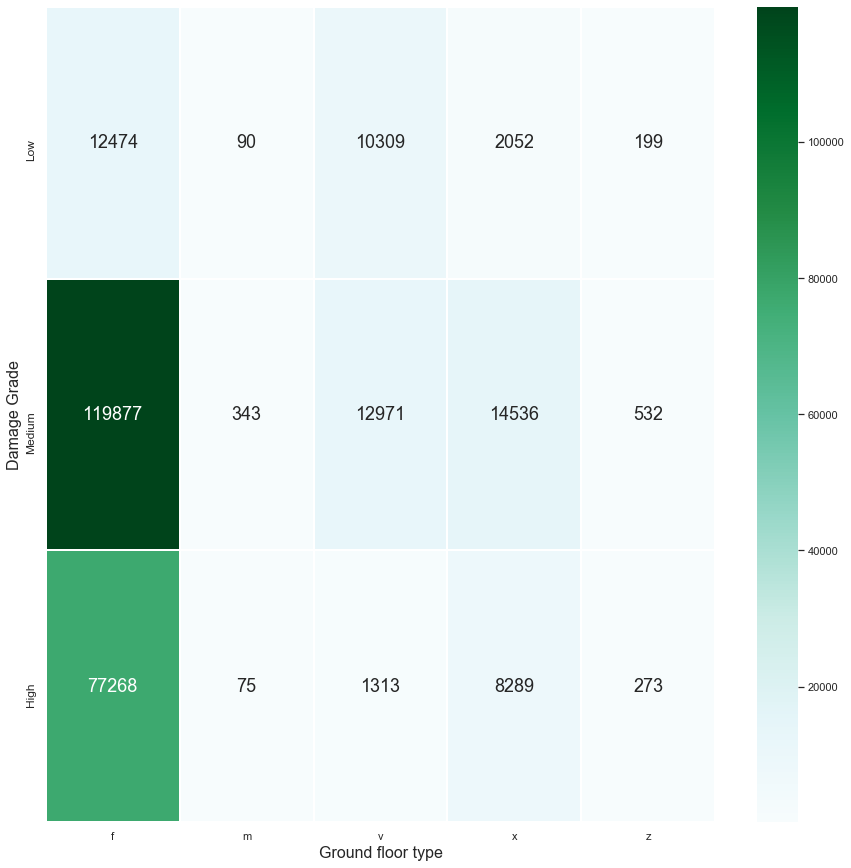

In [39]:
create_dmg_grade_heatmap("ground_floor_type", False)

For ground_floor_type 'v', the number of buildings with damage grade 1 and 2 is substantially greater than that of those buildings with damage grade 3. Can possibly conclude that 'v' is less vulnerable to earthquake damage

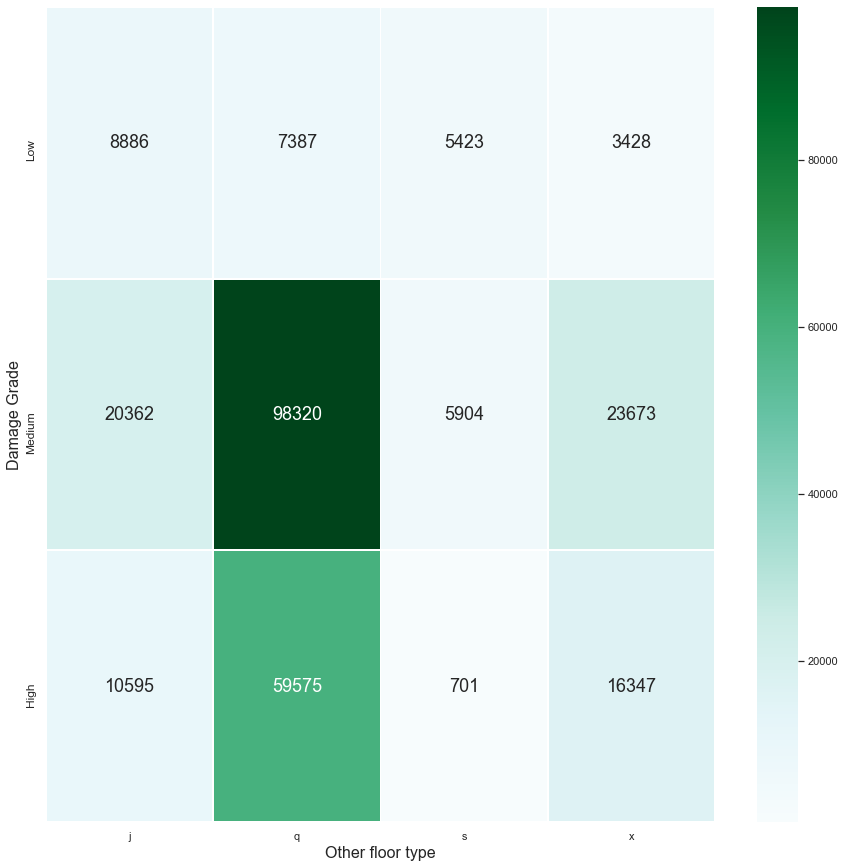

In [40]:
create_dmg_grade_heatmap("other_floor_type", False)

For other_floor_type 's', the number of buildings with damage grade 1 and 2 is substantially greater than that of those buildings with damage grade 3. Can possibly conclude that 's' is less vulnerable to earthquake damage.

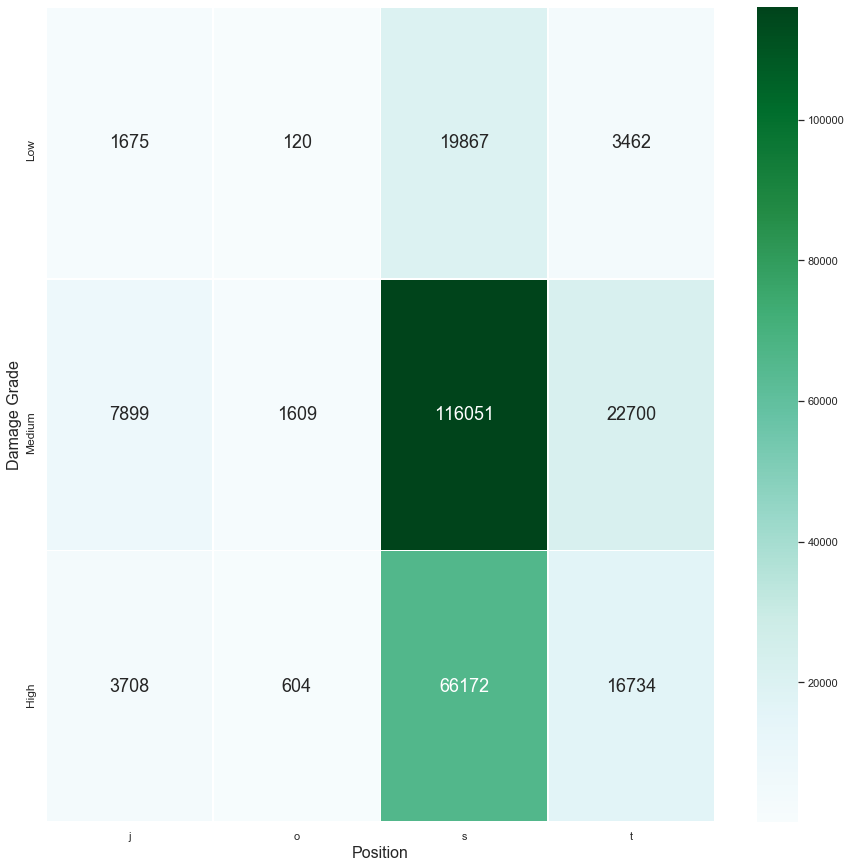

In [41]:
create_dmg_grade_heatmap("position", False)

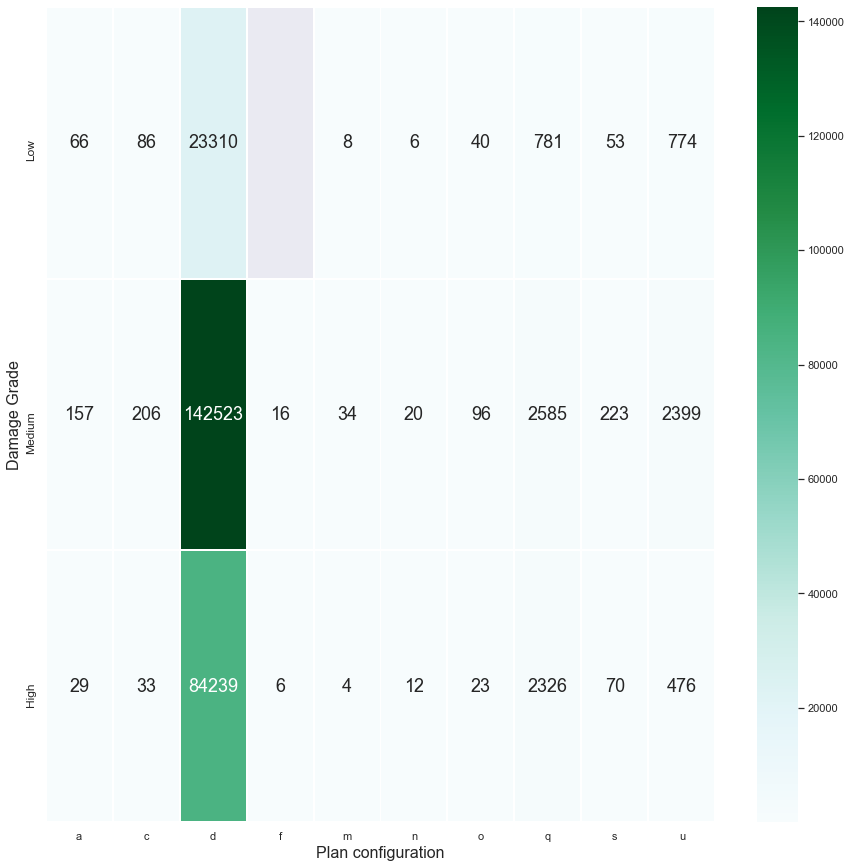

In [42]:
create_dmg_grade_heatmap("plan_configuration", False)

Observation: 'o' ,'u','c'  may be less vulnerable to earthquake

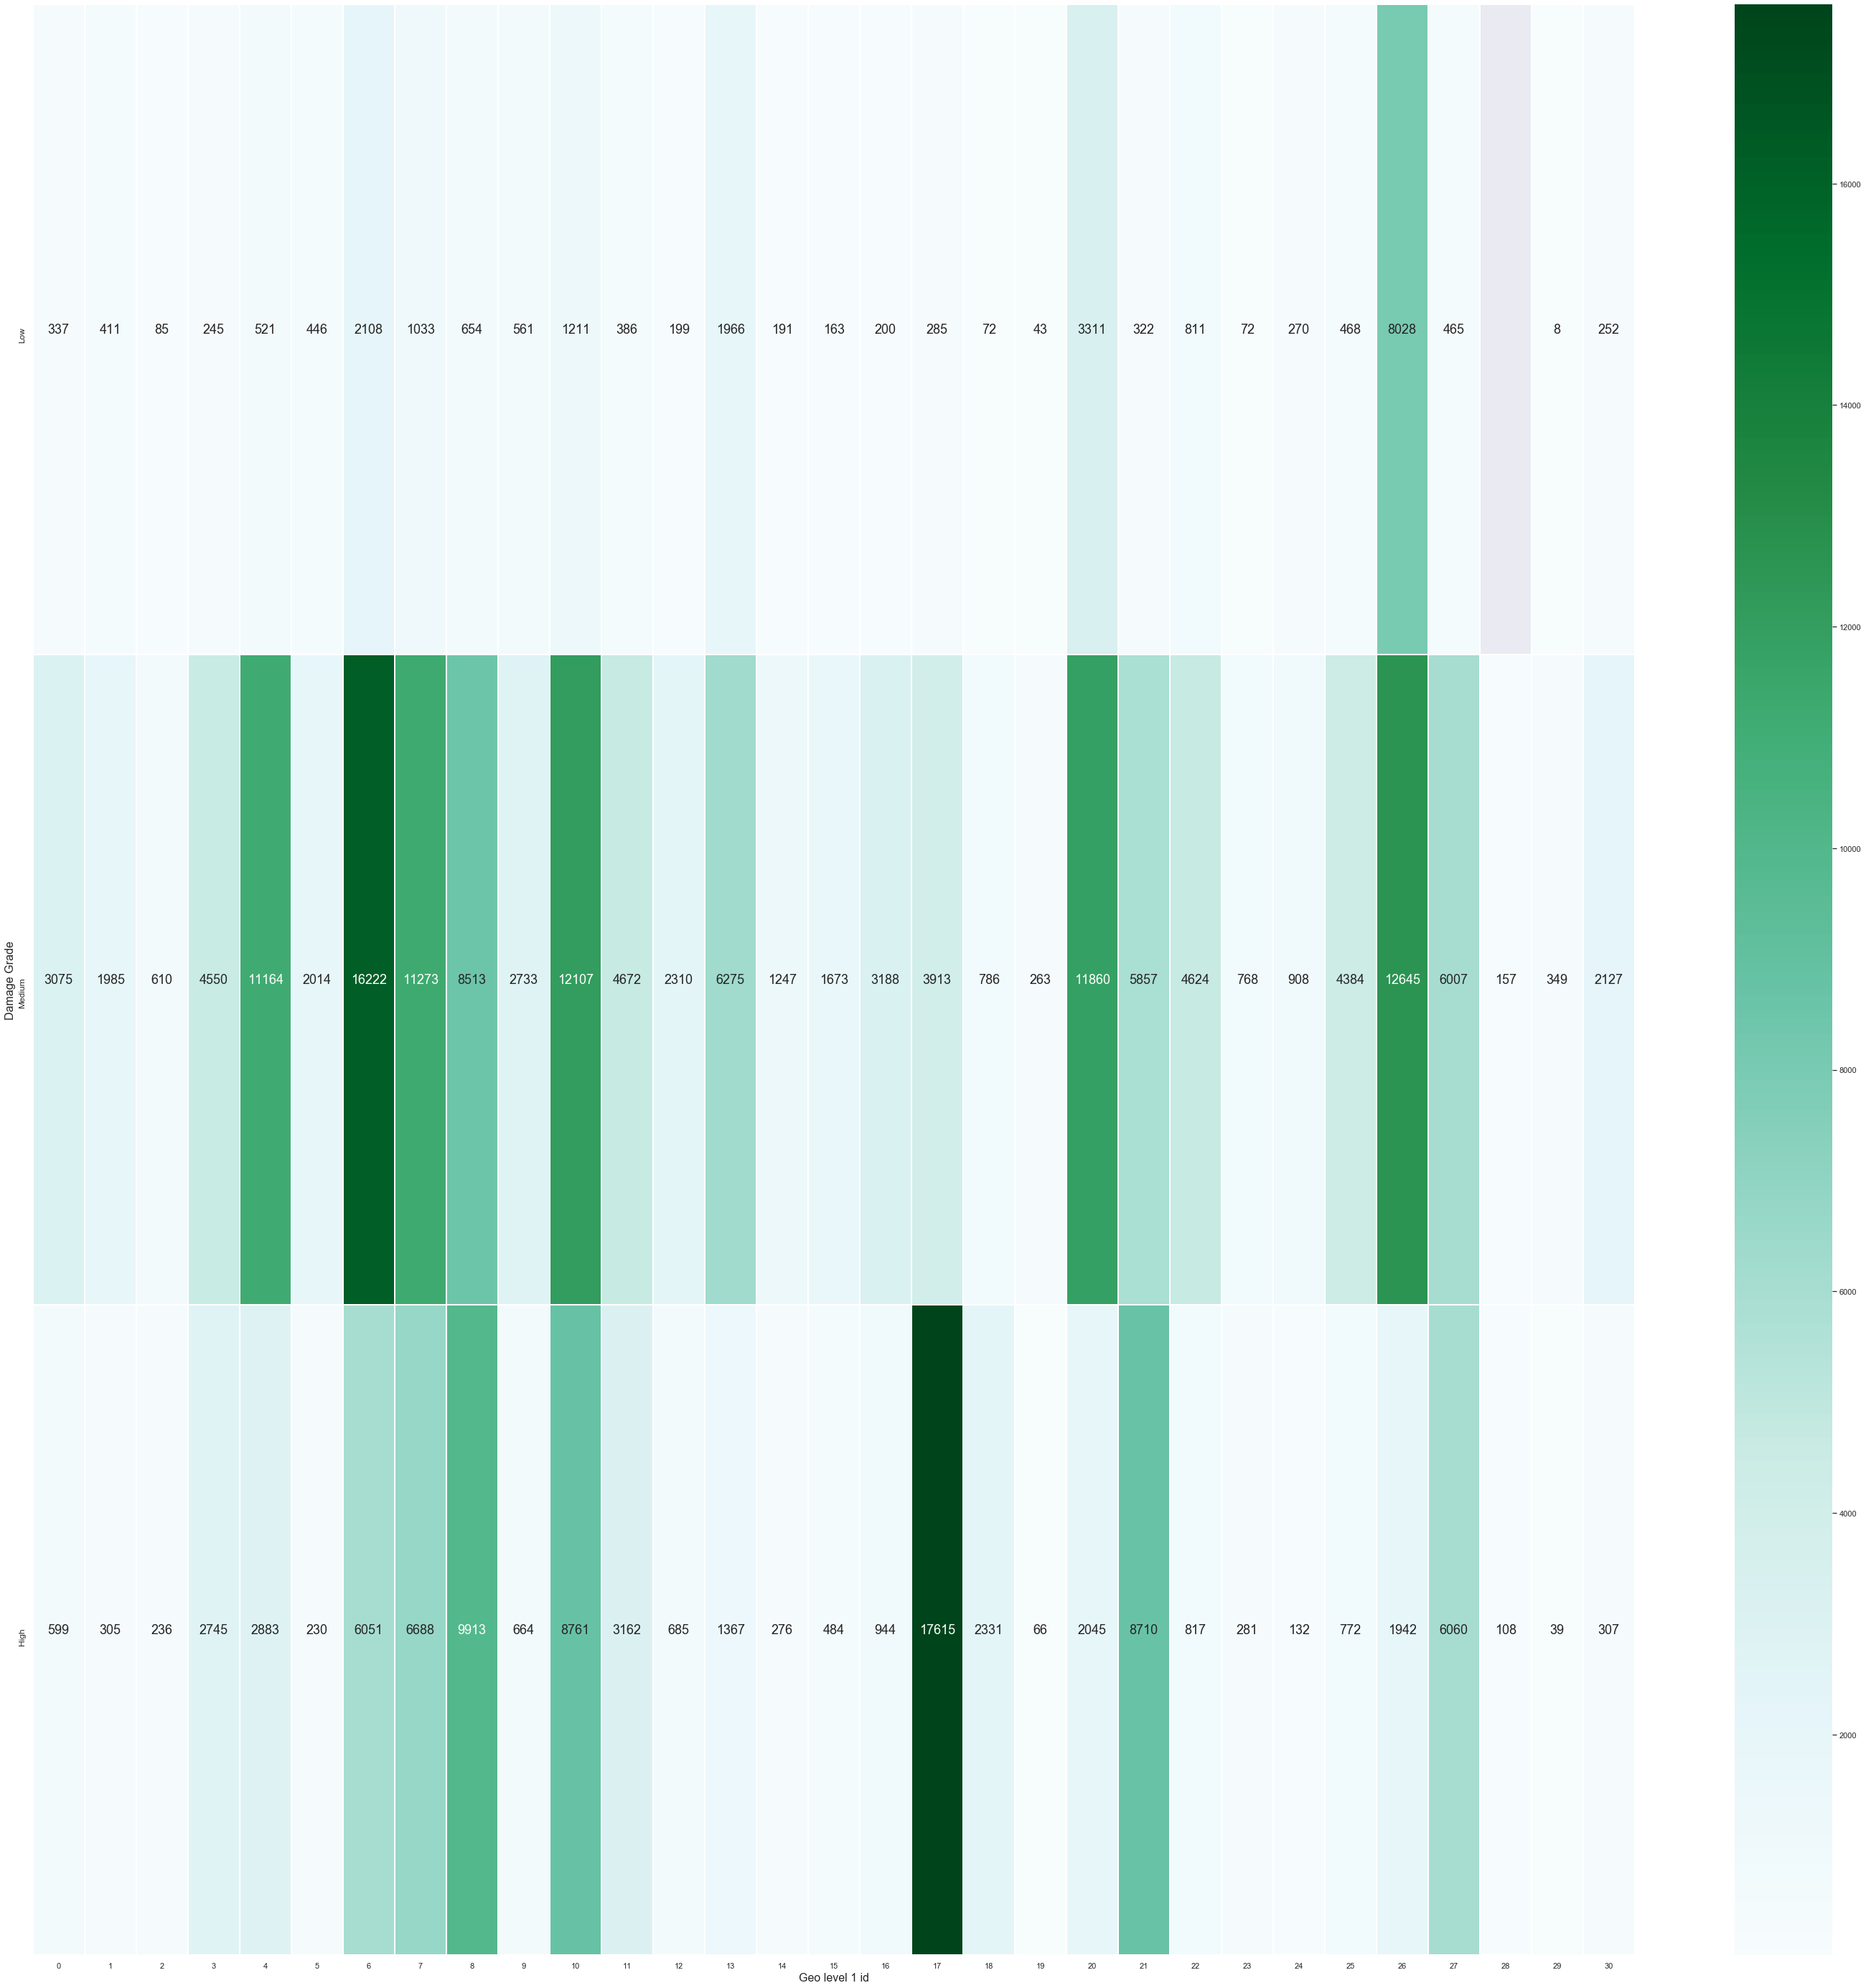

In [43]:
create_dmg_grade_heatmap(column_name = "geo_level_1_id", is_super_structure = False, figsize = (50, 50))

Heatmap clearly indicates that certain regions are more prone to earthquakes resulting in a particular damage level. Can be a potentially important factor in damage grade level.

---
## Machine Learning
In this part of the notebook, we perform machine learning by utilizing several models that we think best fit the current problem/scenario.

In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
import copy

# Getter function for train_test_split function.
def get_train_test_split(test_size = 0.2):
    return train_test_split(one_hot_df, train_labels.iloc[:,1], test_size = test_size)

# Creates confusion matrix and project them onto a seaborn heatmap with its
# relevant labels.
def create_confusion_matrix(y_true, y_pred, iteration, model_name, model_type, show_charts = True):    
    cm = confusion_matrix(y_true, y_pred)
    if show_charts:
        f,axes = plt.subplots(1, 1, figsize=(12, 12))
        sb.heatmap(cm, annot = True, fmt = "g", annot_kws = {"size":18})
        labels = ["Low", "Medium", "High"]
        plt.title("Iteration " + str(iteration) + ": Confusion matrix of Damage Grade for " + model_name + 
                  " on " + model_type.capitalize() + " Dataset", fontsize = 20)
        axes.set_xlabel("Predicted", fontsize=18)
        axes.set_ylabel("True", fontsize=18)
        axes.xaxis.set_ticklabels(labels, fontsize=16)
        axes.yaxis.set_ticklabels(labels, fontsize=16)
        plt.show()
        
    return cm

# Prints a model's details including a confusion matrix heatmap, Classification Accuracy,
# true negative rates, true positive rates, false negative rates and false positive rates,
# and lastly, the model's F1 score.
def print_model_details(y_true, y_pred, classification_accuracy, iteration, model_name,
                        show_charts = True, show_stats = True, model_type = "Train"):
    cm = create_confusion_matrix(y_true, y_pred, iteration, model_name, model_type, show_charts)
    
    if show_stats:
        tnr = (cm[0][0])/(cm[0][0]+cm[0][1])
        tpr = (cm[1][1])/(cm[1][0]+cm[1][1])
        fnr = (cm[1][0])/(cm[1][0]+cm[1][1])
        fpr = (cm[0][1])/(cm[0][1]+cm[0][0])

        f1 = f1_score(y_true, y_pred, average = 'weighted')
        precision = precision_score(y_true, y_pred, average = 'weighted')
        recall = recall_score(y_true, y_pred, average = 'weighted')
        
        print("Goodness of Fit of Model \t", model_type, "Dataset")
        print("Classification Accuracy \t:", classification_accuracy)
        print("Recall Score \t\t\t:", recall)
        print("Precision Score \t\t:", precision)
        print("F1 Score \t\t\t:", f1)
        print()
        print("True Positive Rate \t: %.4f" %tpr)
        print("True Negative Rate \t: %.4f" %tnr)
        print("False Positive Rate \t: %.4f" %fpr)
        print("False Negative Rate \t: %.4f" %fnr)
        print()

After trying out different parameter tunings and research online, we concluded that 100 estimators should be uniformaly used throughout our models aside from Logistics Regression.This number gives us a decent performance.Increasing the number of estimators beyond this could result in overfitting and would drastically increase time consumption.In an attempt to prevent overfitting,the max_features was set to auto for the 3 previously mentioned models,learning rate was set to 0.1 for adaptive boosting and gradient boosting and min_sample_leaf was set to 5 for random forest and adaptive boosting

## Random Forest

In [1]:
def random_forest(x, y, iteration, show_charts = True, show_stats = True, model_type = "Train"):
    rf_train_class_acc = None
    rfc = RandomForestClassifier(n_estimators = 100,
                                 max_features = "auto", 
                                 random_state = 42)
    rfc.fit(x, y)
    
    y_pred = rfc.predict(x)

    if show_stats:
        # Classification Accuracy of Random forest model's prediciton for train data
        rf_class_acc = accuracy_score(y, y_pred)   
        print()
        print("\nParameters of", model_type,"Model")
        print_model_details(y_true = y, 
                            y_pred = y_pred, 
                            classification_accuracy = rf_class_acc,
                            iteration = iteration, 
                            model_name = "Random Forest",
                            show_charts = show_charts, 
                            show_stats = show_stats, 
                            model_type = model_type)
    
    return y_pred, rfc

## Adaptive Boosting


In [46]:
def adaptive_boosting(x, y, iteration, show_charts = True, show_stats = True, model_type = "Train"):
    ab_train_class_acc = None
    abc = AdaBoostClassifier(n_estimators = 100,
                             random_state = 42, 
                             learning_rate = 0.1,
                             base_estimator = DecisionTreeClassifier(max_depth = None, 
                                                                     max_features = "auto", 
                                                                     min_samples_leaf = 5, 
                                                                     random_state = 42))
    abc.fit(x, y)

    y_pred = abc.predict(x)

    if show_stats:
        # Classification accuracy of Random forest model's prediciton for train data
        ab_class_acc = accuracy_score(y, y_pred)       
        print()
        print("\nParameters of", model_type,"Model")
        print_model_details(y_true = y, 
                            y_pred = y_pred, 
                            classification_accuracy = ab_class_acc,
                            iteration = iteration, 
                            model_name = "Adaptive Boosting",
                            show_charts = show_charts, 
                            show_stats = show_stats, 
                            model_type = model_type)
    
    return y_pred, abc

## Gradient Boosting

In [47]:
def gradient_boosting(x, y, iteration, show_charts = True, show_stats = True, model_type = "Train"):
    gb_train_class_acc = None
    gbc = GradientBoostingClassifier(n_estimators = 100,
                                     max_features = "auto", 
                                     max_depth = None, 
                                     learning_rate = 0.1,
                                     random_state = 42, 
                                     max_leaf_nodes = 32)
    gbc.fit(x, y) 
    
    y_pred = gbc.predict(x)

    if show_stats:
        # Classification accuracy of Random forest model's prediciton for train data
        gb_class_acc = accuracy_score(y, y_pred)  
        print()
        print("\nParameters of", model_type, "Model")
        print_model_details(y_true = y, 
                            y_pred = y_pred, 
                            classification_accuracy = gb_class_acc,
                            iteration = iteration, 
                            model_name = "Gradient Boosting",
                            show_charts = show_charts, 
                            show_stats = show_stats, 
                            model_type = model_type)
    
    return y_pred, gbc

## Logistic Regression

In [48]:
def logistic_regression(x, y, iteration, show_charts = True, show_stats = True, model_type = "Train"):
    lr_train_class_acc = None
    lr = LogisticRegression(solver = 'liblinear', multi_class='ovr')
    lr.fit(x, y)
    
    y_pred = lr.predict(x)

    # Classification accuracy of Random forest model's prediciton for train data
    if show_stats:
        lr_class_acc = accuracy_score(y, y_pred)        
        print()
        print("\nParameters of", model_type, "Model")
        print_model_details(y_true = y, 
                            y_pred = y_pred, 
                            classification_accuracy = lr_class_acc,
                            iteration = iteration, 
                            model_name = "Logistic Regression",
                            show_charts = show_charts, 
                            show_stats = show_stats, 
                            model_type = model_type)
        
    return y_pred, lr

## Comparing Models
We're sure that there are many more definitive ways of comparing models, however, for the scope of this project and course, we'll rely on the classification accuracy and F1 scores as metrics to compare the models.

In [49]:
# Performs random train test split for models over n number of iterations.
def train_test_split_loop(one_hot_df, show_iterations = False, iterations = 1, test_size = 0.2):
    y_pred = model = None
    train_accuracy_list = {
        "Random Forest": [],
        "Adaptive Boosting": [],
        "Gradient Boosting": [],
        "Logistic Regression": []
    }
    
    train_f1_score_list = copy.deepcopy(train_accuracy_list)  
    test_accuracy_list = copy.deepcopy(train_accuracy_list)   
    test_f1_score_list = copy.deepcopy(train_accuracy_list)
    
    def handle_scoring(x, y, model, model_name, y_pred, is_test):
        classification_accuracy = model.score(x, y)
        f1 = f1_score(y, y_pred, average = "weighted")
        if not is_test:
            train_accuracy_list[model_name].append(classification_accuracy)
            train_f1_score_list[model_name].append(f1)
        else:
            test_accuracy_list[model_name].append(classification_accuracy)
            test_f1_score_list[model_name].append(f1)
    
    for i in range(iterations):
        if show_iterations:
            display(HTML("<h1>Iteration {0}</h1>".format(i + 1)))
        
        X_train, X_test, y_train, y_test = get_train_test_split()
        
        # -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        if show_iterations:
            display(HTML("<h3>Random Forest</h3>"))
            
        y_pred, rf_model = random_forest(x = X_train, 
                                         y = y_train, 
                                         iteration = i + 1,
                                         show_charts = show_iterations, 
                                         show_stats = show_iterations)          
        handle_scoring(x = X_train, 
                       y = y_train, 
                       model = rf_model, 
                       model_name = "Random Forest",
                       y_pred = y_pred, 
                       is_test = False)
        
        y_pred, rf_model = random_forest(x = X_test, 
                                         y = y_test, 
                                         iteration = i + 1,
                                         show_charts = show_iterations, 
                                         show_stats = show_iterations, 
                                         model_type = "Test")              
        handle_scoring(x = X_test, 
                       y = y_test,
                       model = rf_model,
                       model_name = "Random Forest",
                       y_pred = y_pred,
                       is_test = True)
        
        # -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        if show_iterations:
            display(HTML("<h3>Adaptive Boosting</h3>"))
        
        y_pred, ab_model = adaptive_boosting(x = X_train, 
                                             y = y_train, 
                                             iteration = i + 1,
                                             show_charts = show_iterations,                                                              
                                             show_stats = show_iterations)
        handle_scoring(x = X_train, 
                       y = y_train, 
                       model = ab_model, 
                       model_name = "Adaptive Boosting",
                       y_pred = y_pred, 
                       is_test = False)
        
        y_pred, ab_model = adaptive_boosting(x = X_test, 
                                             y = y_test, 
                                             iteration = i + 1,
                                             show_charts = show_iterations, 
                                             show_stats = show_iterations,
                                             model_type = "Test")
        handle_scoring(x = X_test, 
                       y = y_test, 
                       model = ab_model, 
                       model_name = "Adaptive Boosting", 
                       y_pred = y_pred, 
                       is_test = True)
        
        # -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        if show_iterations:
            display(HTML("<h3>Gradient Boosting</h3>"))
        
        y_pred, gb_model = gradient_boosting(x = X_train, 
                                             y = y_train, 
                                             iteration = i + 1,
                                             show_charts = show_iterations, 
                                             show_stats = show_iterations)
        handle_scoring(x = X_train, 
                       y = y_train, 
                       model = gb_model, 
                       model_name = "Gradient Boosting",
                       y_pred = y_pred, 
                       is_test =  False)
        
        y_pred, gb_model = gradient_boosting(x = X_test, 
                                             y = y_test, 
                                             iteration = i + 1,
                                             show_charts = show_iterations, 
                                             show_stats = show_iterations, 
                                             model_type = "Test")
        handle_scoring(x = X_test, 
                       y = y_test, 
                       model = gb_model, 
                       model_name = "Gradient Boosting",
                       y_pred = y_pred, 
                       is_test = True)
        
        # -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        if show_iterations:
            display(HTML("<h3>Logistic Regression</h3>"))
        
        y_pred, lr_model = logistic_regression(x = X_train, 
                                               y = y_train,
                                               iteration = i + 1,
                                               show_charts = show_iterations, 
                                               show_stats = show_iterations)
        handle_scoring(x = X_train, 
                       y = y_train, 
                       model = lr_model, 
                       model_name = "Logistic Regression",
                       y_pred = y_pred, 
                       is_test = False)
       
        y_pred, lr_model = logistic_regression(x = X_test, 
                                               y = y_test, 
                                               iteration = i + 1,
                                               show_charts = show_iterations, 
                                               show_stats = show_iterations, 
                                               model_type = "Test")
        handle_scoring(x = X_test, 
                       y = y_test,
                       model = lr_model, 
                       model_name = "Logistic Regression", 
                       y_pred = y_pred, 
                       is_test = True)
       
    return train_accuracy_list, train_f1_score_list, test_accuracy_list, test_f1_score_list


# Does a similar thing to train_test_split_loop except that it prints only the classification
# accuracy or F1 score.
# Function takes in a list of tuples consisting of the model's name and the model's classifier.
# Example:

# models = [
#     ('LR', LogisticRegression()),
#     ('NB', GaussianNB()),
#     ('SVM', SVC()),
#     ('KNN', KNeighborsClassifier()),
#     ('DT', DecisionTreeClassifier()),
# ]
# @Deprecated, leaving here just in case
def summarized_train_test_split(models, is_train = True):
    X_train, X_test, y_train, y_test = get_train_test_split()
    accuracy_list = f1_score_list = []
    
    for name, model in models:
        clf = model
        clf.fit(X_train if is_train else X_test, y_train if is_train else y_test)
        y_pred = model.predict(X_train if is_train else X_test)
        classification_accuracy = clf.score(X_train if is_train else X_test, y_train if is_train else y_test)
        f1 = f1_score(y_train if is_train else y_test, y_pred, average = 'weighted')
        print(name)
        print("Classification Accuracy \t:", classification_accuracy)
        print("The F1 Score \t:", f1)
        print()
        accuracy_list.append(classification_accuracy)
        f1_score_list.append(f1)
    
    return accuracy_list, f1_score_list



Parameters of Train Model


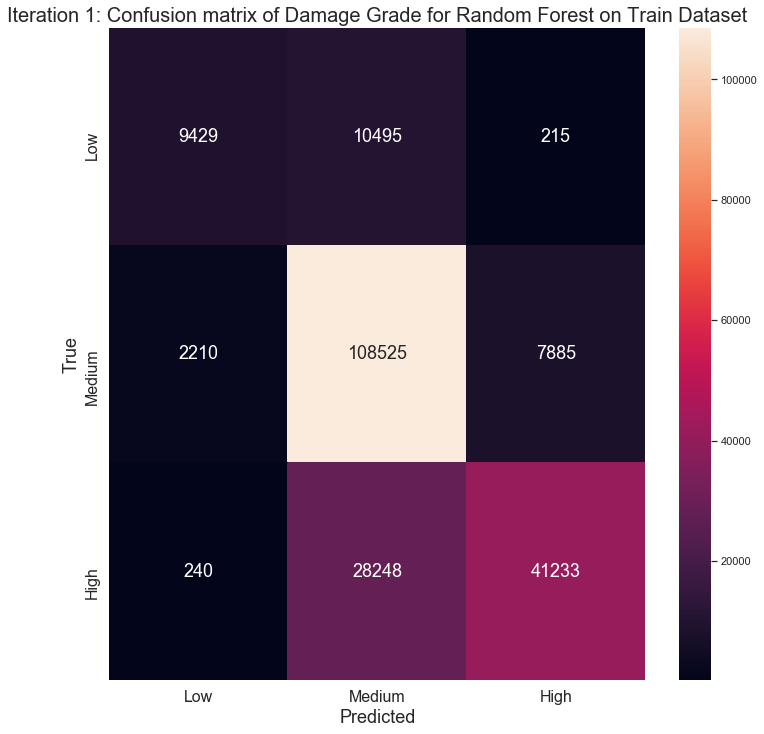

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7635600537221796
Recall Score 			: 0.7635600537221796
Precision Score 		: 0.7754823379597838
F1 Score 			: 0.7530106494620578

True Positive Rate 	: 0.9800
True Negative Rate 	: 0.4732
False Positive Rate 	: 0.5268
False Negative Rate 	: 0.0200



Parameters of Test Model


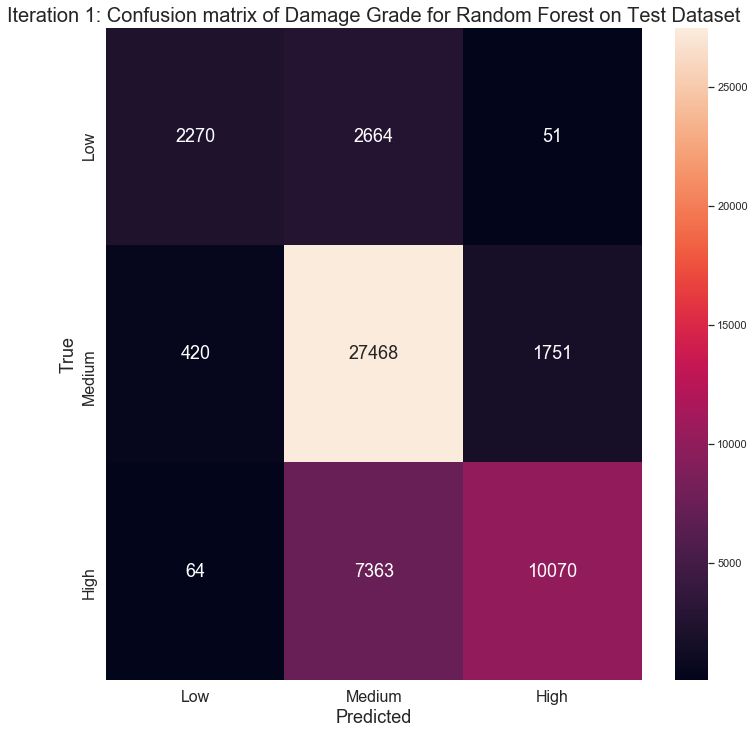

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7637612478655437
Recall Score 			: 0.7637612478655437
Precision Score 		: 0.7801651816524771
F1 Score 			: 0.7516507901987398

True Positive Rate 	: 0.9849
True Negative Rate 	: 0.4601
False Positive Rate 	: 0.5399
False Negative Rate 	: 0.0151





Parameters of Train Model


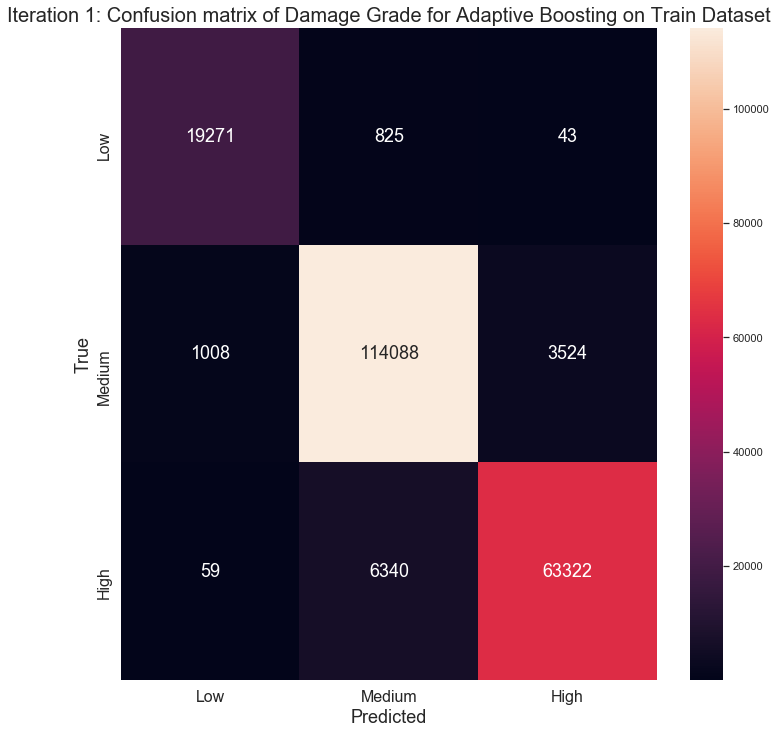

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.9434046431312356
Recall Score 			: 0.9434046431312356
Precision Score 		: 0.9434766172288162
F1 Score 			: 0.9432398943064166

True Positive Rate 	: 0.9912
True Negative Rate 	: 0.9589
False Positive Rate 	: 0.0411
False Negative Rate 	: 0.0088



Parameters of Test Model


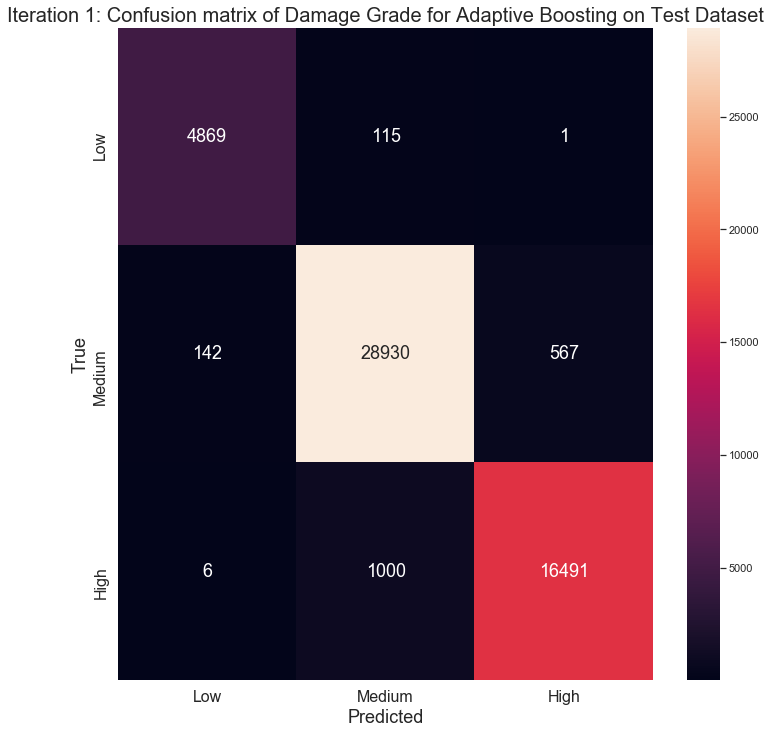

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.9648702058671169
Recall Score 			: 0.9648702058671169
Precision Score 		: 0.96489759056256
F1 Score 			: 0.964805949670582

True Positive Rate 	: 0.9951
True Negative Rate 	: 0.9769
False Positive Rate 	: 0.0231
False Negative Rate 	: 0.0049





Parameters of Train Model


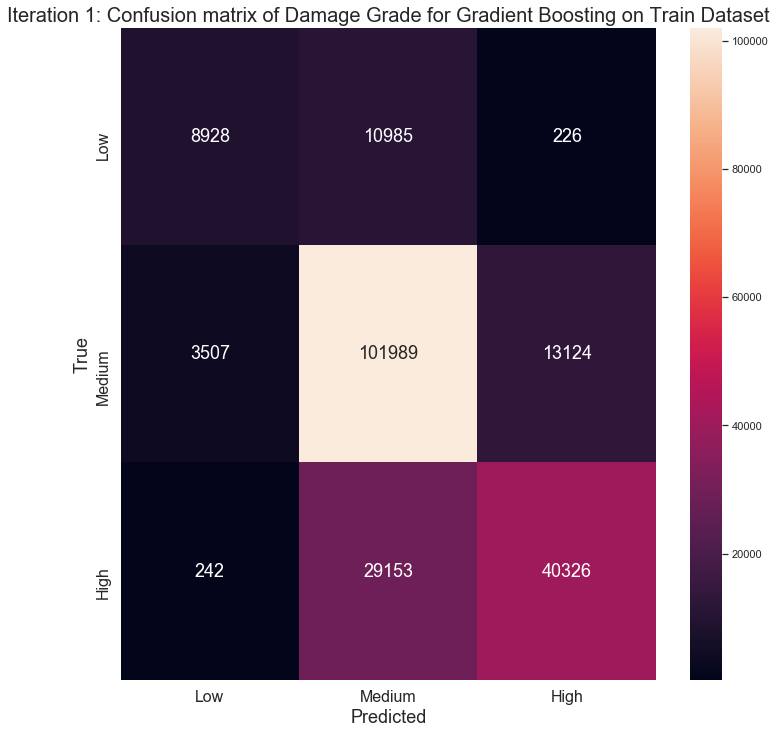

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.725455679201842
Recall Score 			: 0.725455679201842
Precision Score 		: 0.7275720354440731
F1 Score 			: 0.7162416147322469

True Positive Rate 	: 0.9668
True Negative Rate 	: 0.4484
False Positive Rate 	: 0.5516
False Negative Rate 	: 0.0332



Parameters of Test Model


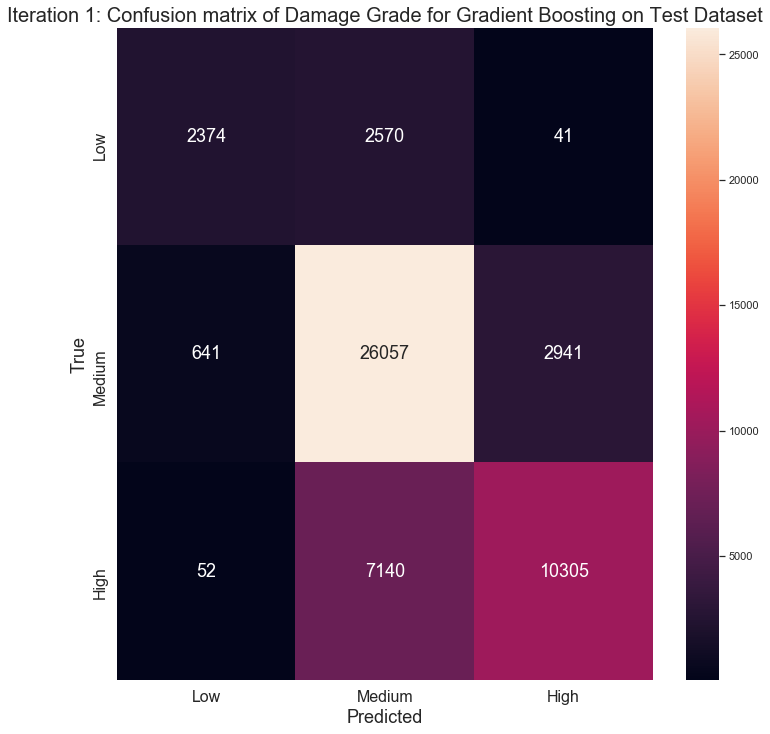

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7431937223000327
Recall Score 			: 0.7431937223000327
Precision Score 		: 0.7486693670143678
F1 Score 			: 0.7342428402087449

True Positive Rate 	: 0.9760
True Negative Rate 	: 0.4802
False Positive Rate 	: 0.5198
False Negative Rate 	: 0.0240





Parameters of Train Model


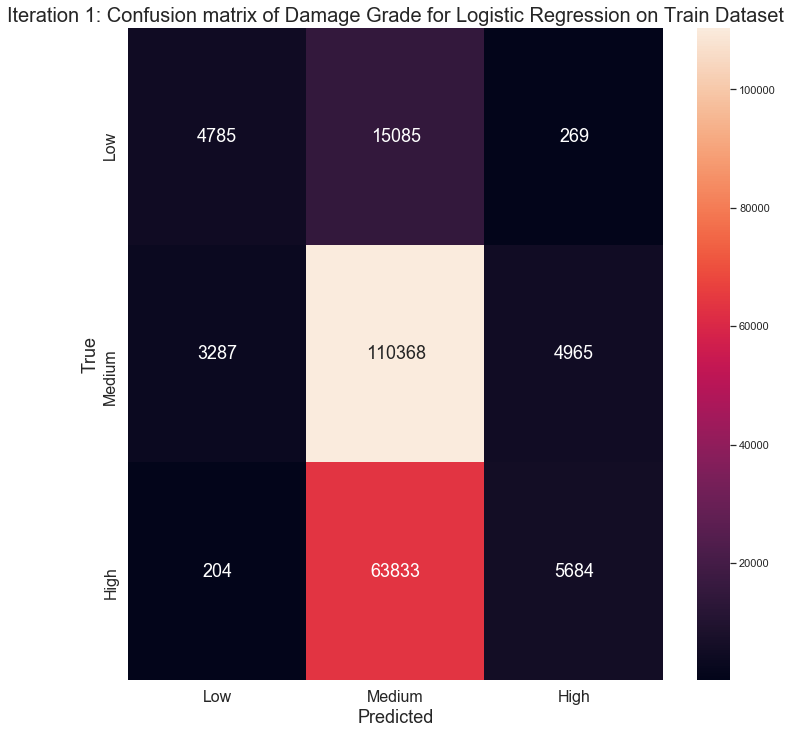

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.5796095548733692
Recall Score 			: 0.5796095548733692
Precision Score 		: 0.5617116452204274
F1 Score 			: 0.48757444191107274

True Positive Rate 	: 0.9711
True Negative Rate 	: 0.2408
False Positive Rate 	: 0.7592
False Negative Rate 	: 0.0289



Parameters of Test Model


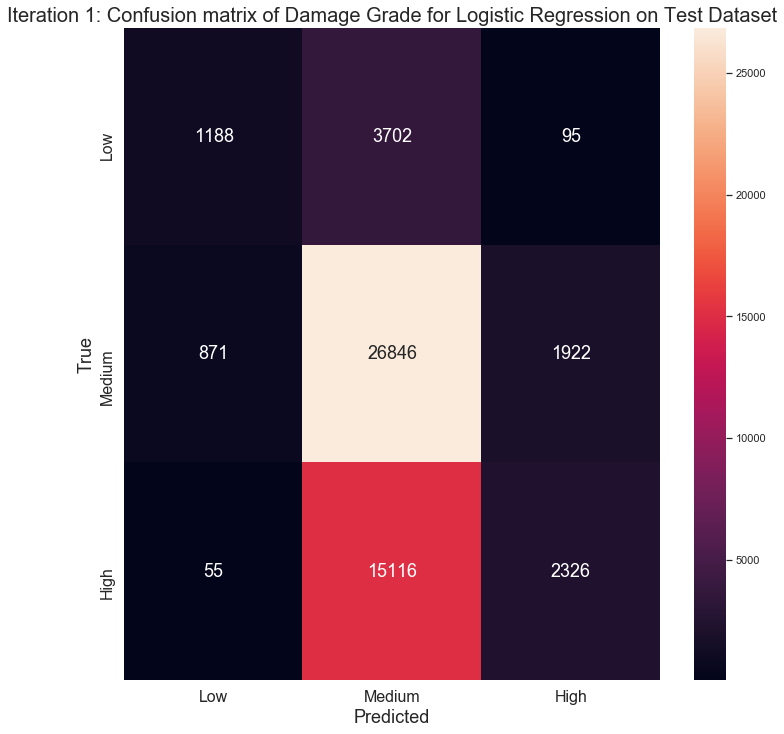

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.5824907426948831
Recall Score 			: 0.5824907426948831
Precision Score 		: 0.5678557931645775
F1 Score 			: 0.5089765171385445

True Positive Rate 	: 0.9686
True Negative Rate 	: 0.2429
False Positive Rate 	: 0.7571
False Negative Rate 	: 0.0314





Parameters of Train Model


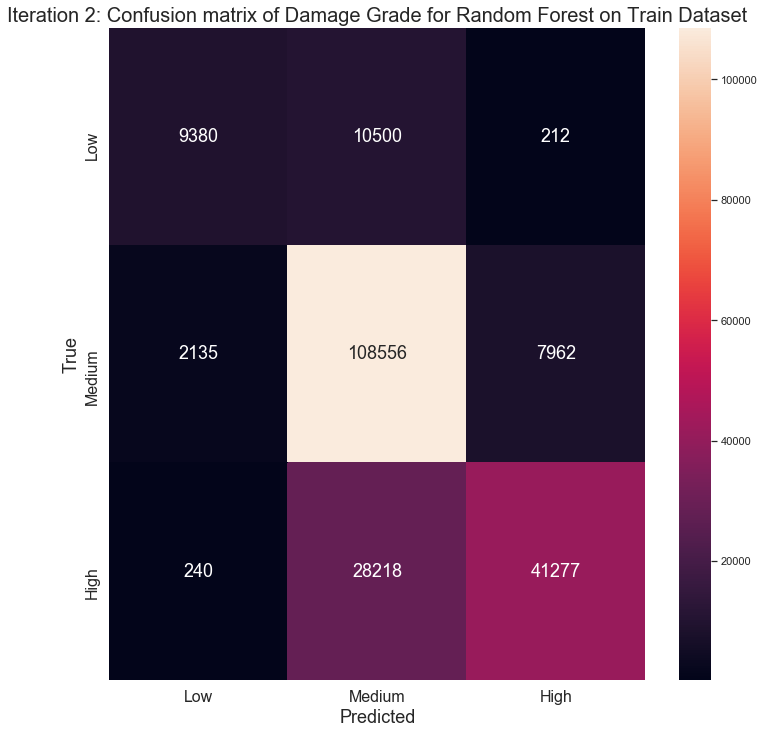

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.763684765924789
Recall Score 			: 0.763684765924789
Precision Score 		: 0.7756146000604858
F1 Score 			: 0.7531167363714121

True Positive Rate 	: 0.9807
True Negative Rate 	: 0.4718
False Positive Rate 	: 0.5282
False Negative Rate 	: 0.0193



Parameters of Test Model


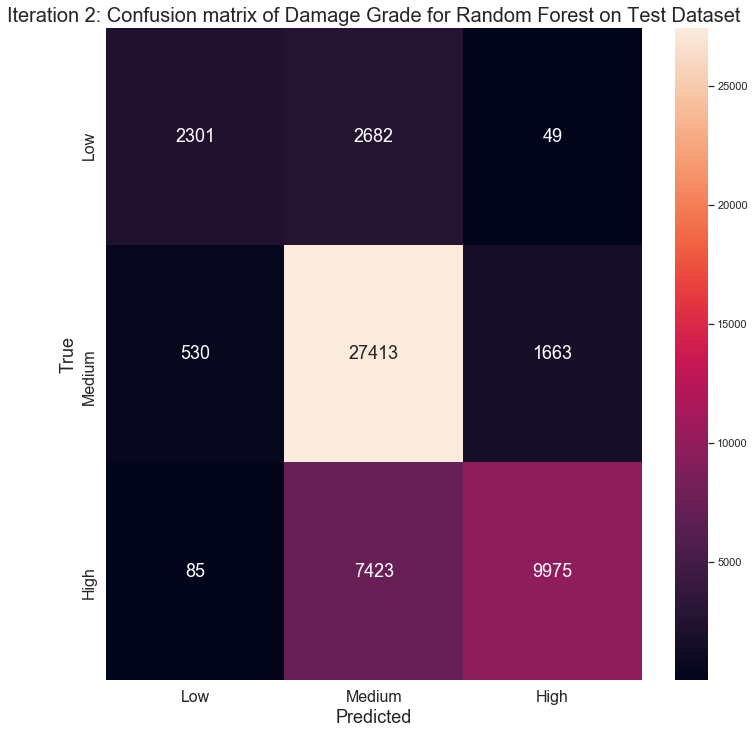

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7614780990387752
Recall Score 			: 0.7614780990387752
Precision Score 		: 0.7775115563092355
F1 Score 			: 0.74926407999742

True Positive Rate 	: 0.9810
True Negative Rate 	: 0.4618
False Positive Rate 	: 0.5382
False Negative Rate 	: 0.0190





Parameters of Train Model


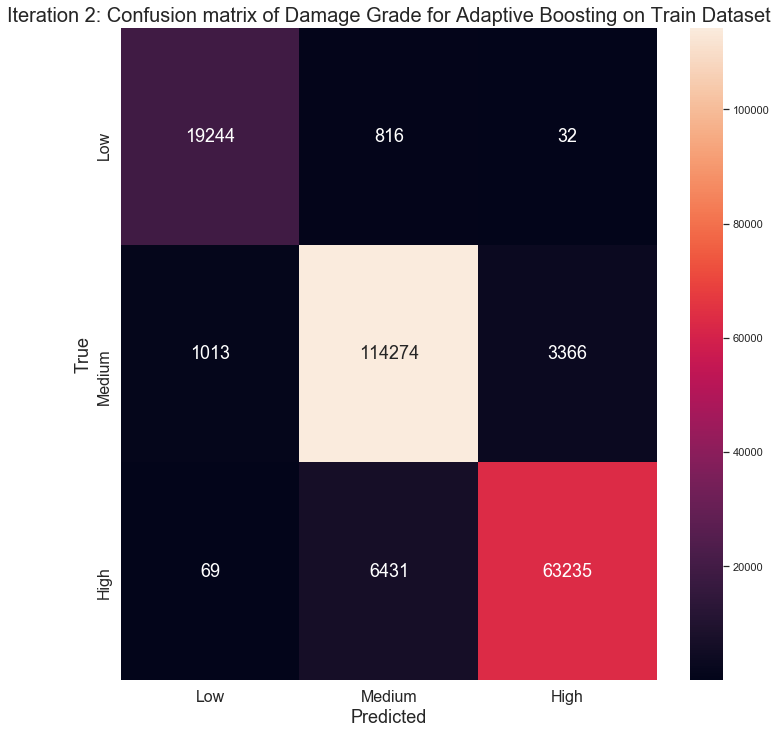

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.94375
Recall Score 			: 0.94375
Precision Score 		: 0.9438713687736454
F1 Score 			: 0.9435697699625138

True Positive Rate 	: 0.9912
True Negative Rate 	: 0.9593
False Positive Rate 	: 0.0407
False Negative Rate 	: 0.0088



Parameters of Test Model


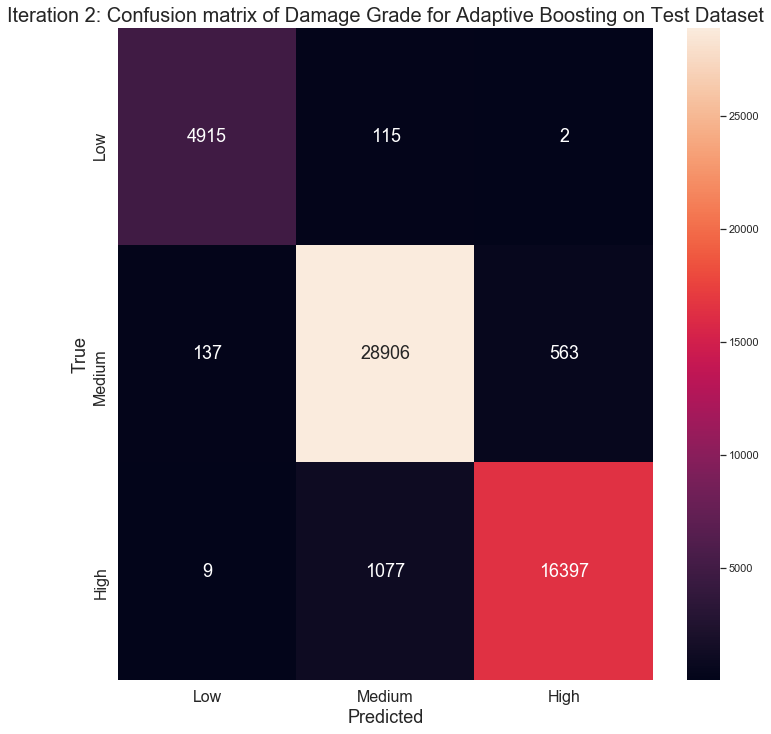

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.963488804896299
Recall Score 			: 0.963488804896299
Precision Score 		: 0.9635457370674732
F1 Score 			: 0.963406061719271

True Positive Rate 	: 0.9953
True Negative Rate 	: 0.9771
False Positive Rate 	: 0.0229
False Negative Rate 	: 0.0047





Parameters of Train Model


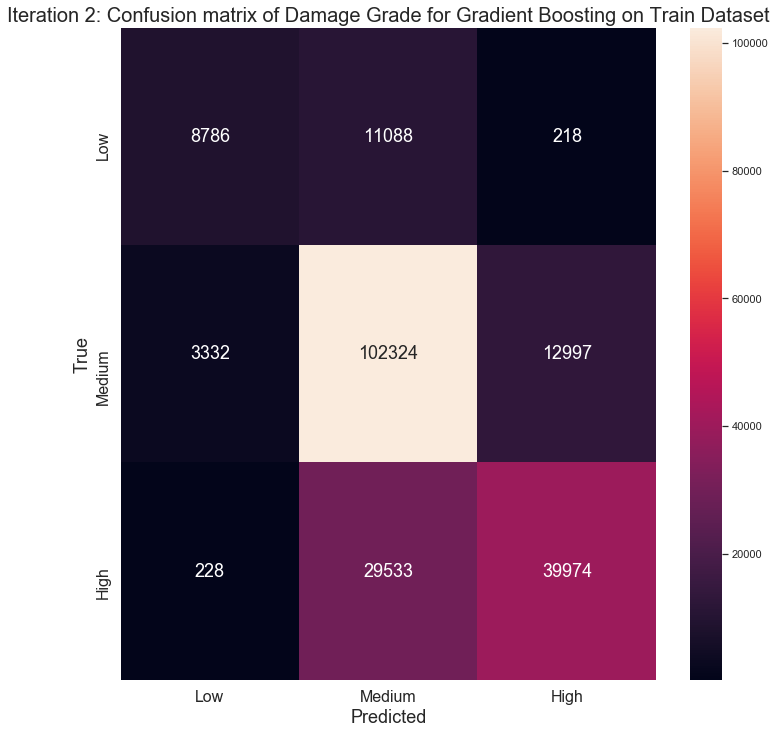

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7246930161166538
Recall Score 			: 0.7246930161166538
Precision Score 		: 0.727372504319137
F1 Score 			: 0.7149888421268558

True Positive Rate 	: 0.9685
True Negative Rate 	: 0.4421
False Positive Rate 	: 0.5579
False Negative Rate 	: 0.0315



Parameters of Test Model


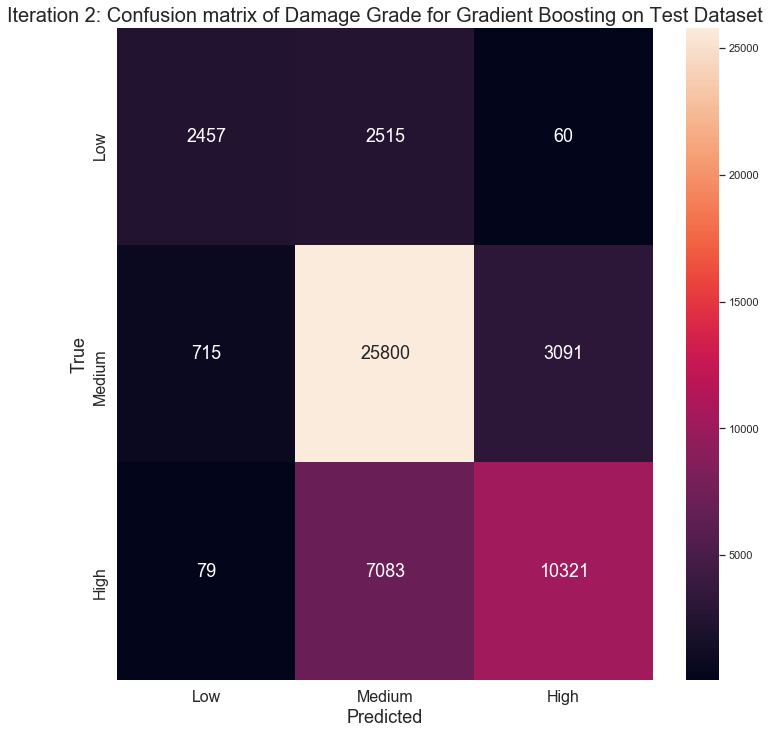

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7401623146140711
Recall Score 			: 0.7401623146140711
Precision Score 		: 0.7439487406334488
F1 Score 			: 0.7318510680359072

True Positive Rate 	: 0.9730
True Negative Rate 	: 0.4942
False Positive Rate 	: 0.5058
False Negative Rate 	: 0.0270





Parameters of Train Model


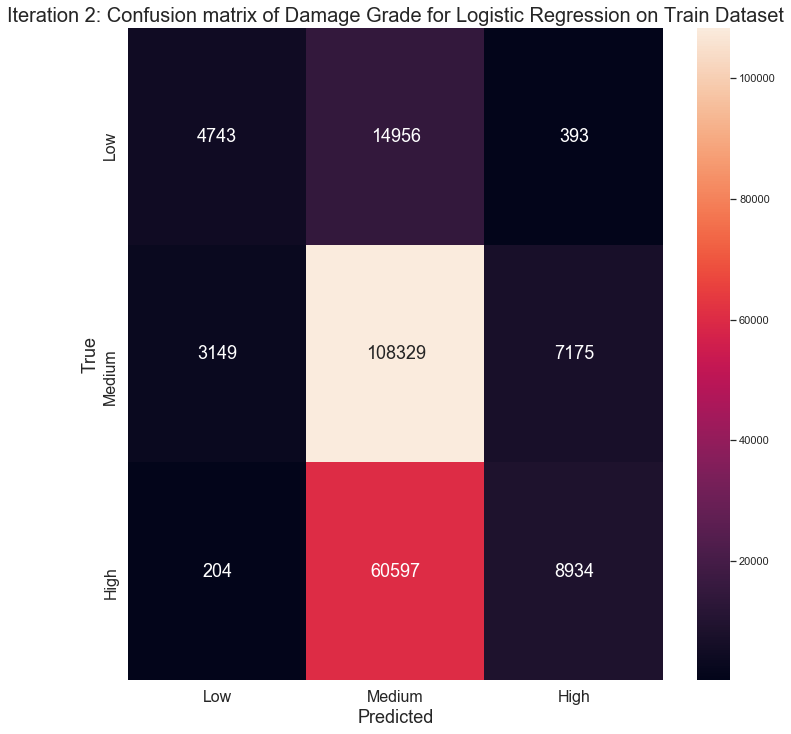

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.5852168073676132
Recall Score 			: 0.5852168073676132
Precision Score 		: 0.5728400243405745
F1 Score 			: 0.5093184821623236

True Positive Rate 	: 0.9718
True Negative Rate 	: 0.2408
False Positive Rate 	: 0.7592
False Negative Rate 	: 0.0282



Parameters of Test Model


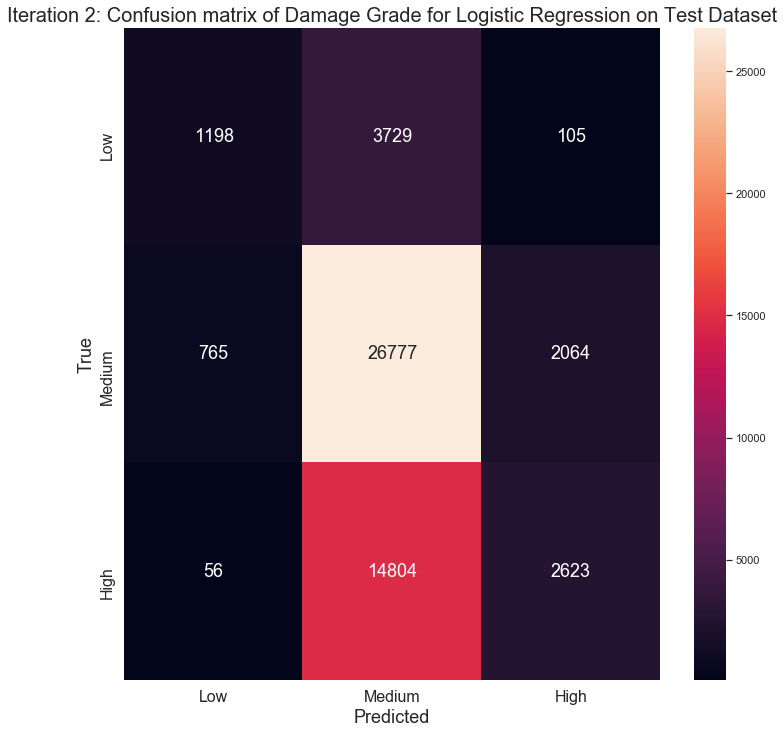

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.58705704034842
Recall Score 			: 0.58705704034842
Precision Score 		: 0.5765783226718757
F1 Score 			: 0.5178588905605004

True Positive Rate 	: 0.9722
True Negative Rate 	: 0.2431
False Positive Rate 	: 0.7569
False Negative Rate 	: 0.0278





Parameters of Train Model


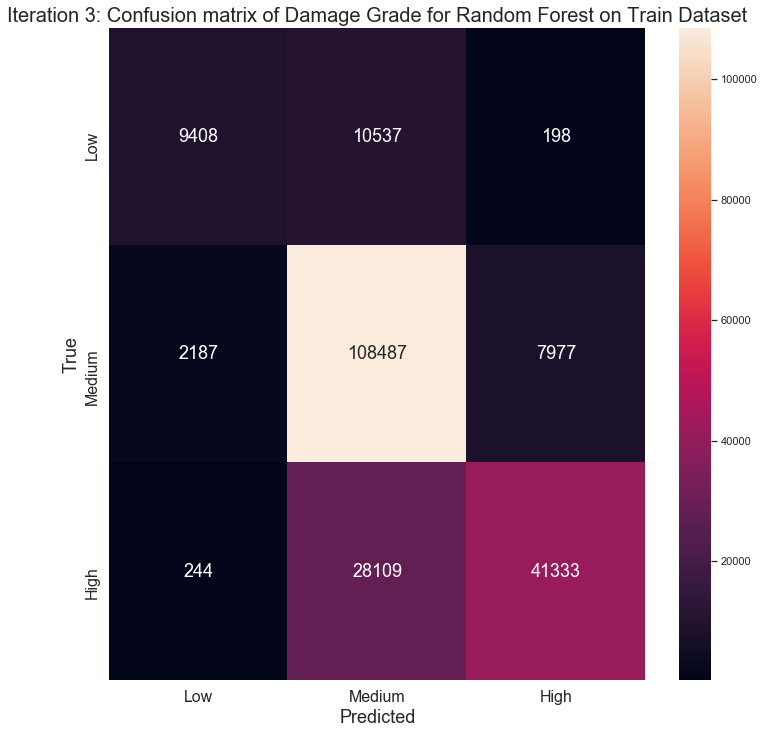

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7637567152724482
Recall Score 			: 0.7637567152724482
Precision Score 		: 0.7754800131053026
F1 Score 			: 0.7532721849718371

True Positive Rate 	: 0.9802
True Negative Rate 	: 0.4717
False Positive Rate 	: 0.5283
False Negative Rate 	: 0.0198



Parameters of Test Model


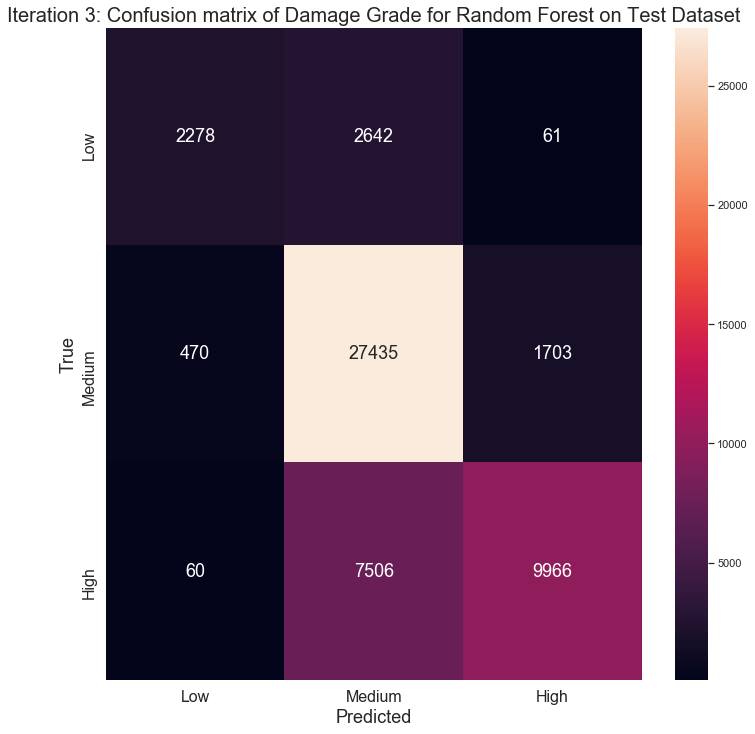

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7612862377928282
Recall Score 			: 0.7612862377928282
Precision Score 		: 0.7779916608206727
F1 Score 			: 0.748916127427302

True Positive Rate 	: 0.9832
True Negative Rate 	: 0.4630
False Positive Rate 	: 0.5370
False Negative Rate 	: 0.0168





Parameters of Train Model


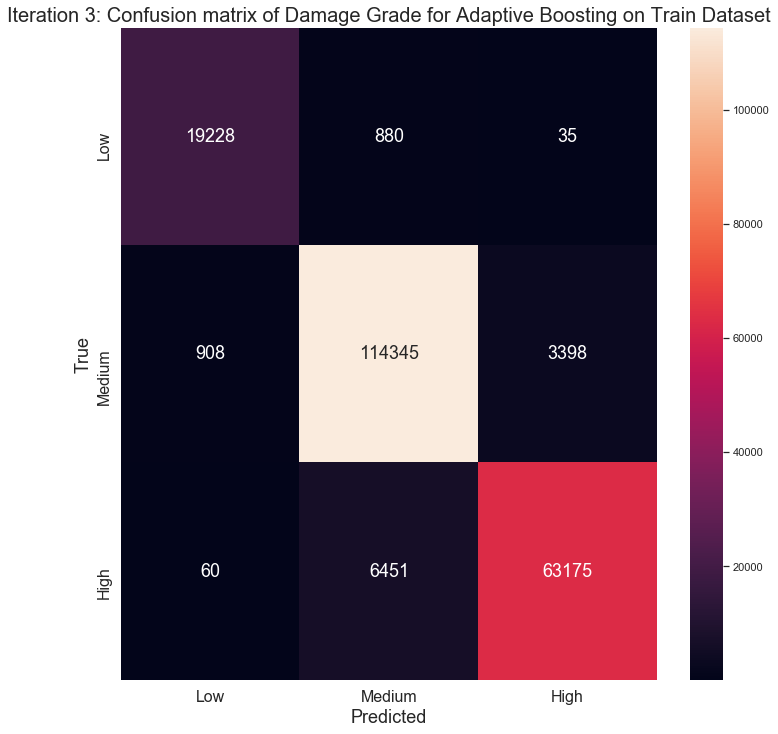

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.9437260168841136
Recall Score 			: 0.9437260168841136
Precision Score 		: 0.9438514767019646
F1 Score 			: 0.9435446529024246

True Positive Rate 	: 0.9921
True Negative Rate 	: 0.9562
False Positive Rate 	: 0.0438
False Negative Rate 	: 0.0079



Parameters of Test Model


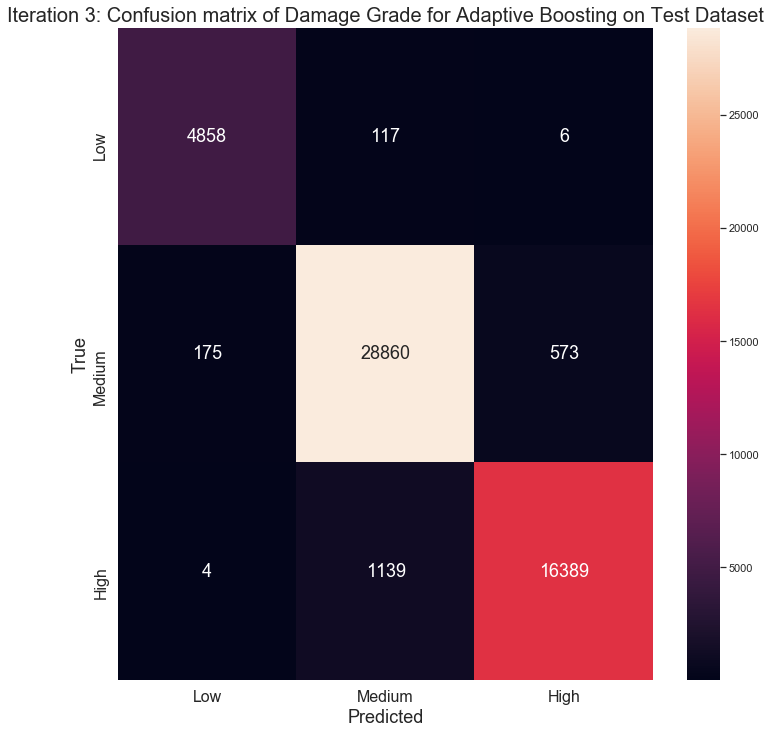

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.9613591450662881
Recall Score 			: 0.9613591450662881
Precision Score 		: 0.9614345660381225
F1 Score 			: 0.961268805420013

True Positive Rate 	: 0.9940
True Negative Rate 	: 0.9765
False Positive Rate 	: 0.0235
False Negative Rate 	: 0.0060





Parameters of Train Model


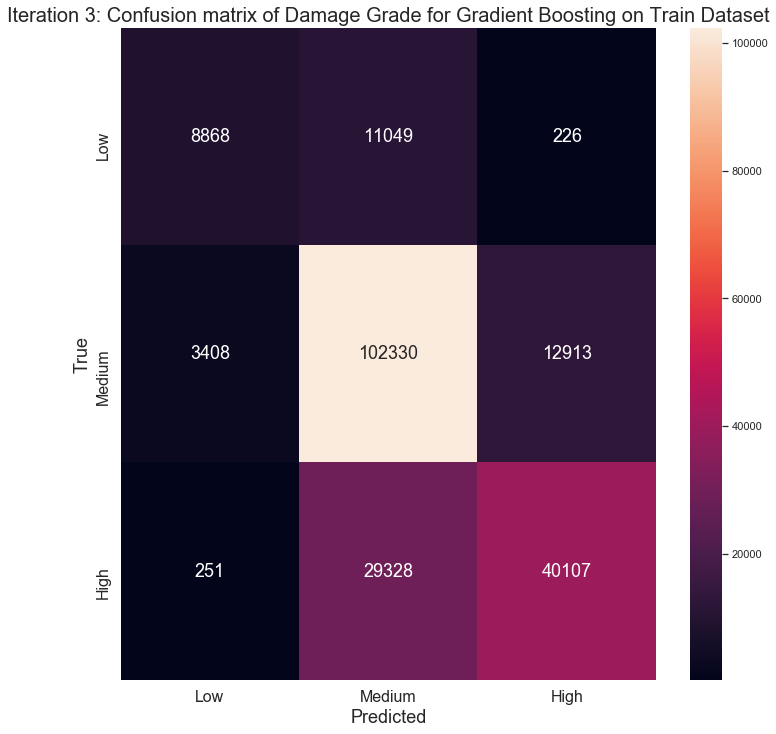

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7257530698388335
Recall Score 			: 0.7257530698388335
Precision Score 		: 0.728271426857574
F1 Score 			: 0.7162184198609699

True Positive Rate 	: 0.9678
True Negative Rate 	: 0.4452
False Positive Rate 	: 0.5548
False Negative Rate 	: 0.0322



Parameters of Test Model


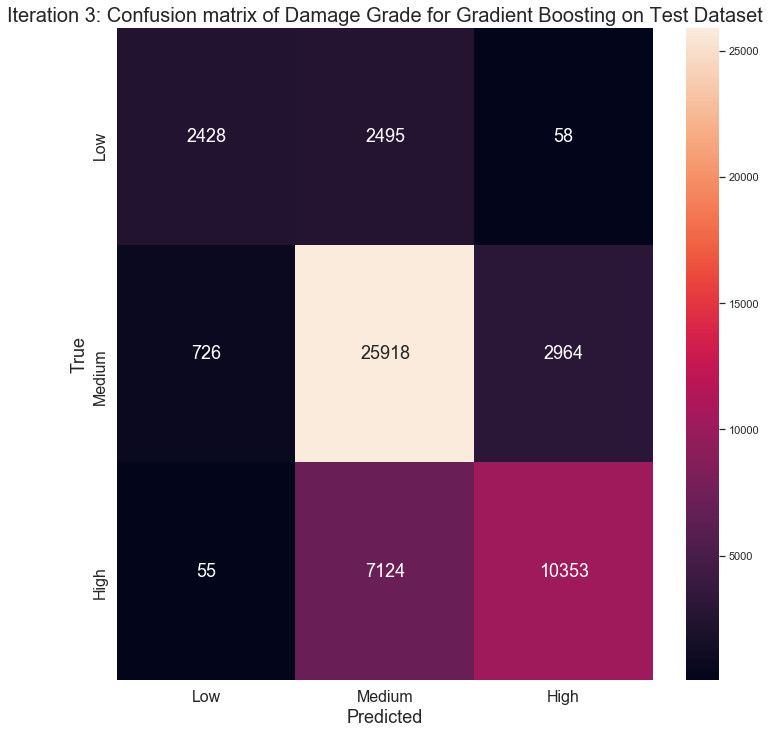

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.742483835690029
Recall Score 			: 0.742483835690029
Precision Score 		: 0.7469795499123869
F1 Score 			: 0.7340217685036757

True Positive Rate 	: 0.9728
True Negative Rate 	: 0.4932
False Positive Rate 	: 0.5068
False Negative Rate 	: 0.0272





Parameters of Train Model


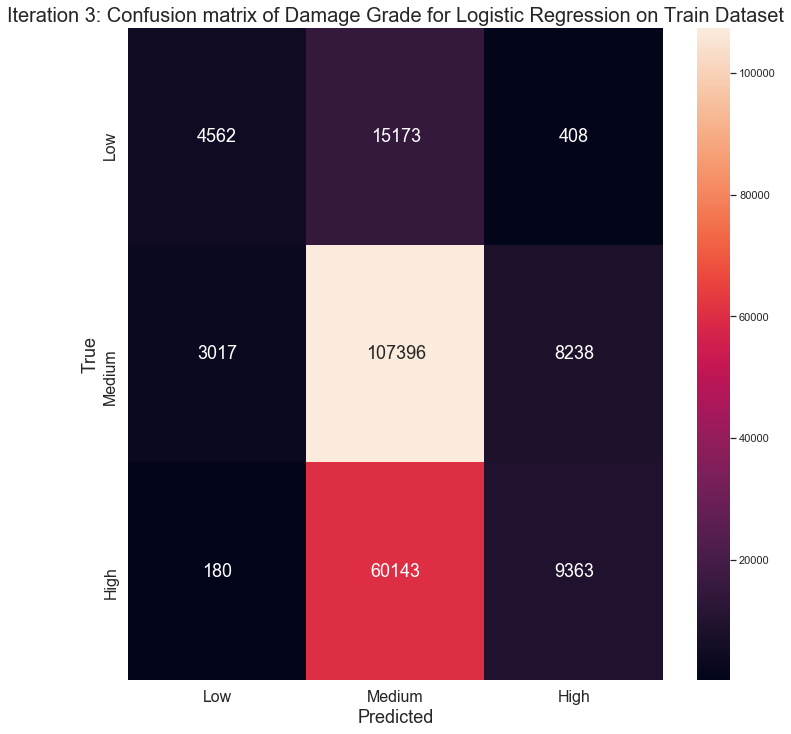

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.5819311204911742
Recall Score 			: 0.5819311204911742
Precision Score 		: 0.5651152648747182
F1 Score 			: 0.5086049961525951

True Positive Rate 	: 0.9727
True Negative Rate 	: 0.2312
False Positive Rate 	: 0.7688
False Negative Rate 	: 0.0273



Parameters of Test Model


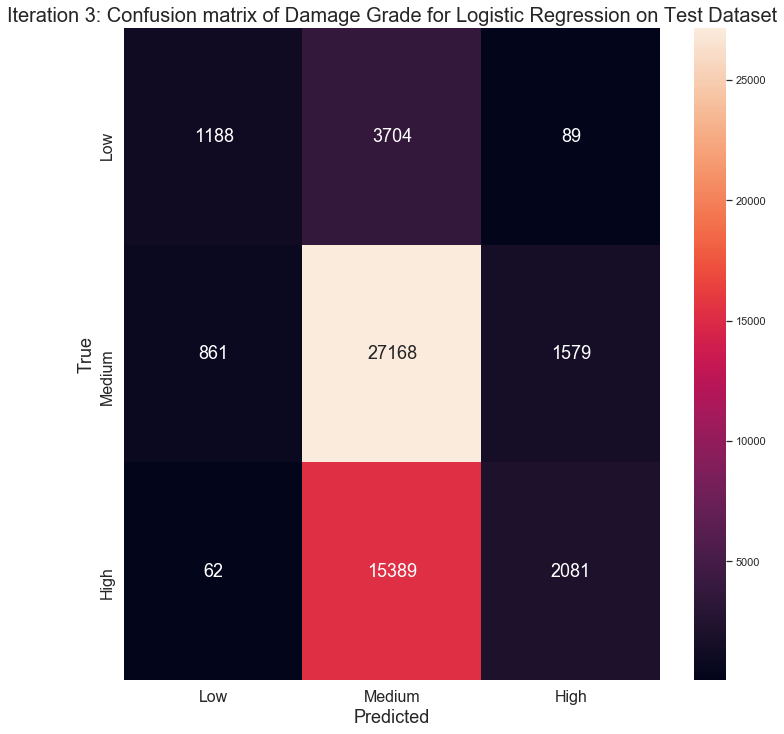

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.5839680742886745
Recall Score 			: 0.5839680742886745
Precision Score 		: 0.574104676541627
F1 Score 			: 0.5046385951938551

True Positive Rate 	: 0.9693
True Negative Rate 	: 0.2428
False Positive Rate 	: 0.7572
False Negative Rate 	: 0.0307





Parameters of Train Model


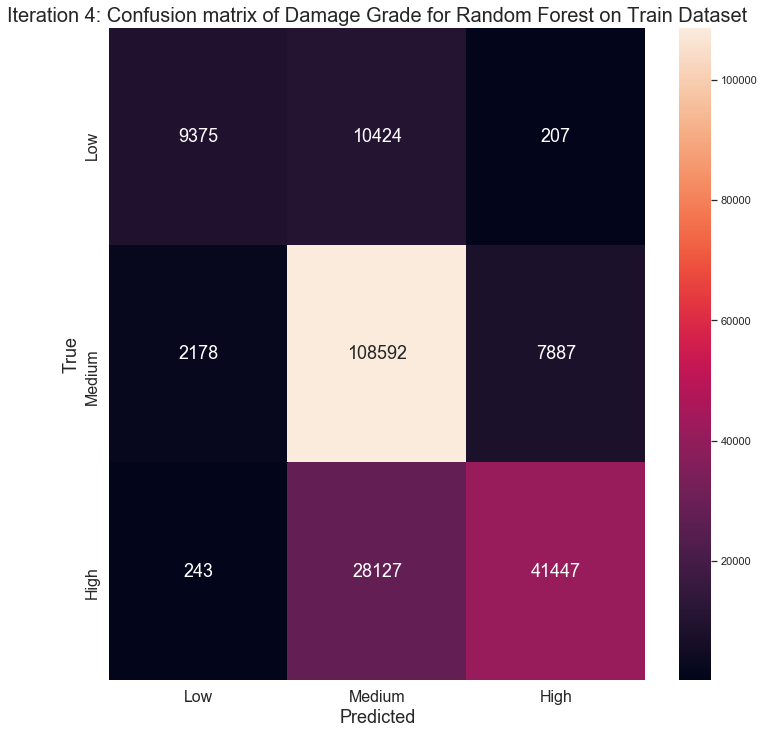

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7646488871834228
Recall Score 			: 0.7646488871834228
Precision Score 		: 0.7764751520559537
F1 Score 			: 0.7542075332426368

True Positive Rate 	: 0.9803
True Negative Rate 	: 0.4735
False Positive Rate 	: 0.5265
False Negative Rate 	: 0.0197



Parameters of Test Model


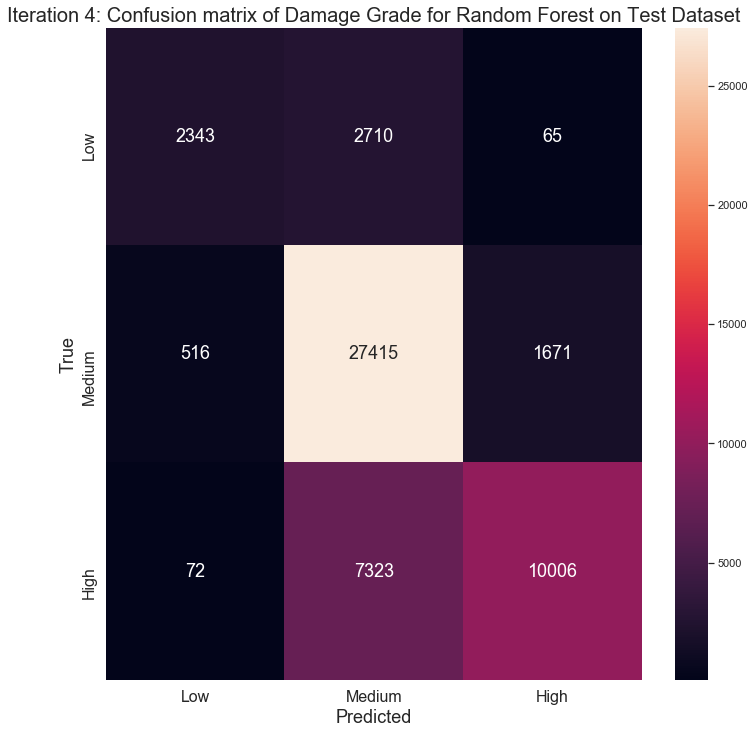

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7629170583833771
Recall Score 			: 0.7629170583833771
Precision Score 		: 0.7787779620615987
F1 Score 			: 0.7508597767114423

True Positive Rate 	: 0.9815
True Negative Rate 	: 0.4637
False Positive Rate 	: 0.5363
False Negative Rate 	: 0.0185





Parameters of Train Model


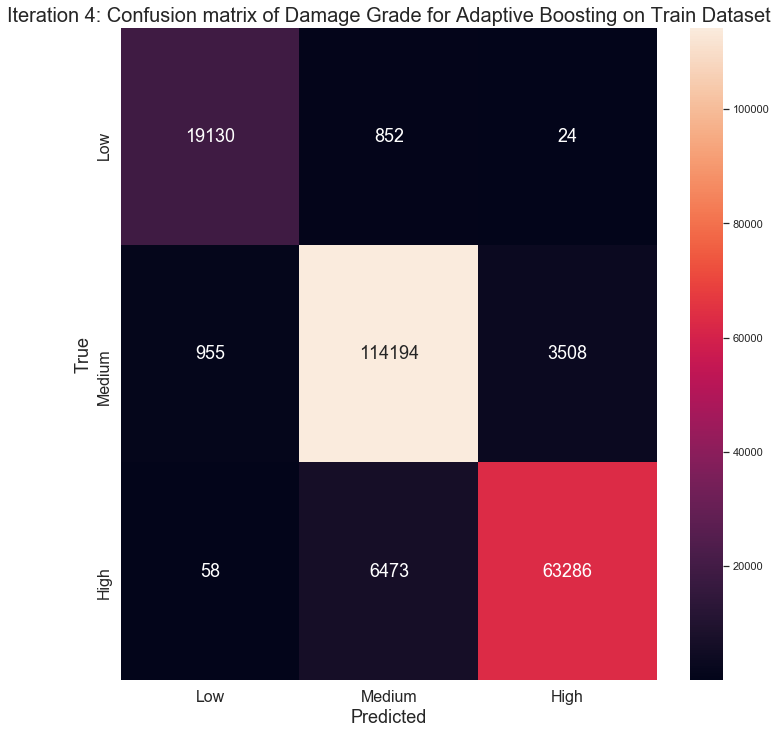

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.9430640828856485
Recall Score 			: 0.9430640828856485
Precision Score 		: 0.9431642368144709
F1 Score 			: 0.9428867086429522

True Positive Rate 	: 0.9917
True Negative Rate 	: 0.9574
False Positive Rate 	: 0.0426
False Negative Rate 	: 0.0083



Parameters of Test Model


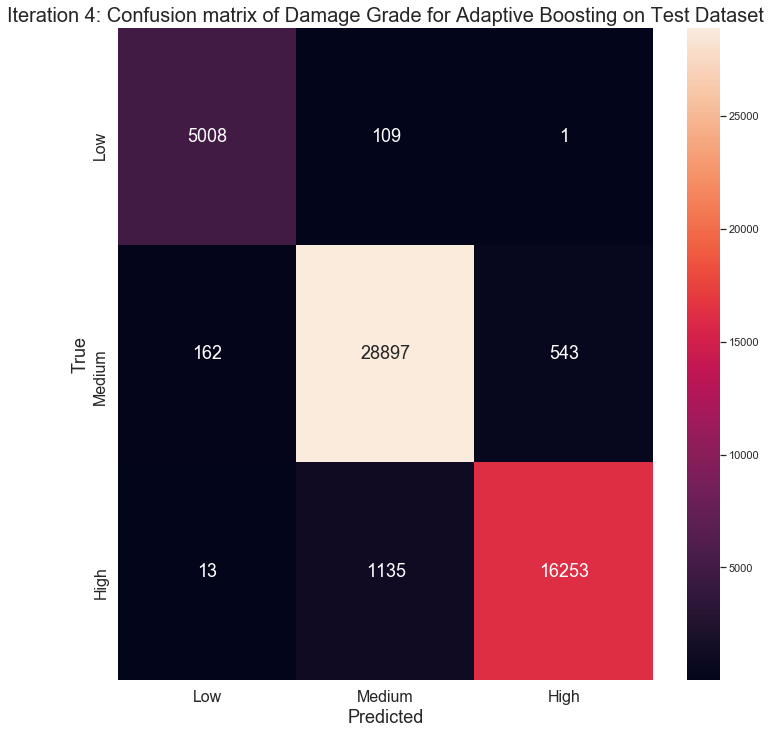

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.9623376374206174
Recall Score 			: 0.9623376374206174
Precision Score 		: 0.9624312477458248
F1 Score 			: 0.9622368944410394

True Positive Rate 	: 0.9944
True Negative Rate 	: 0.9787
False Positive Rate 	: 0.0213
False Negative Rate 	: 0.0056





Parameters of Train Model


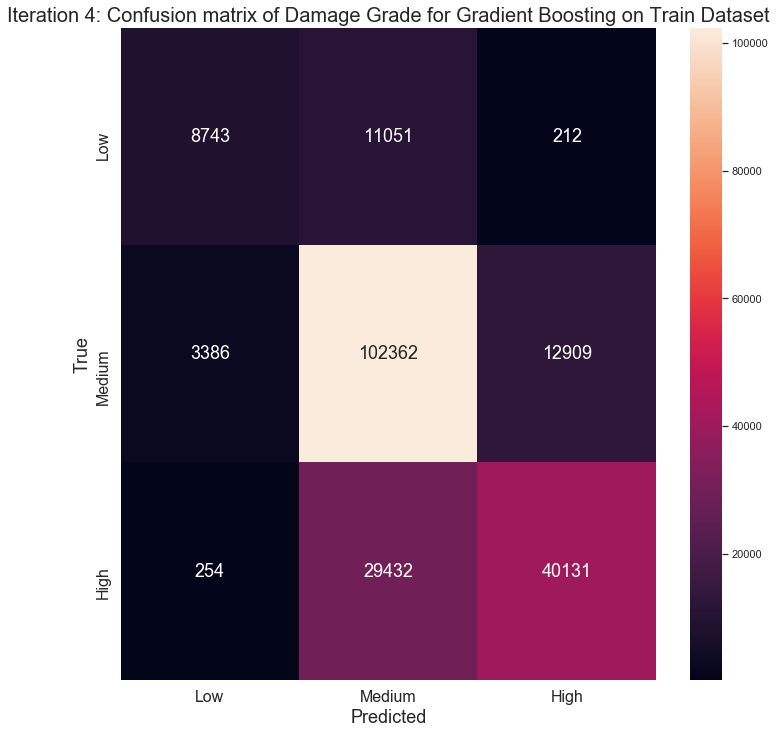

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.725422102839601
Recall Score 			: 0.725422102839601
Precision Score 		: 0.7279771967400662
F1 Score 			: 0.7157867292748281

True Positive Rate 	: 0.9680
True Negative Rate 	: 0.4417
False Positive Rate 	: 0.5583
False Negative Rate 	: 0.0320



Parameters of Test Model


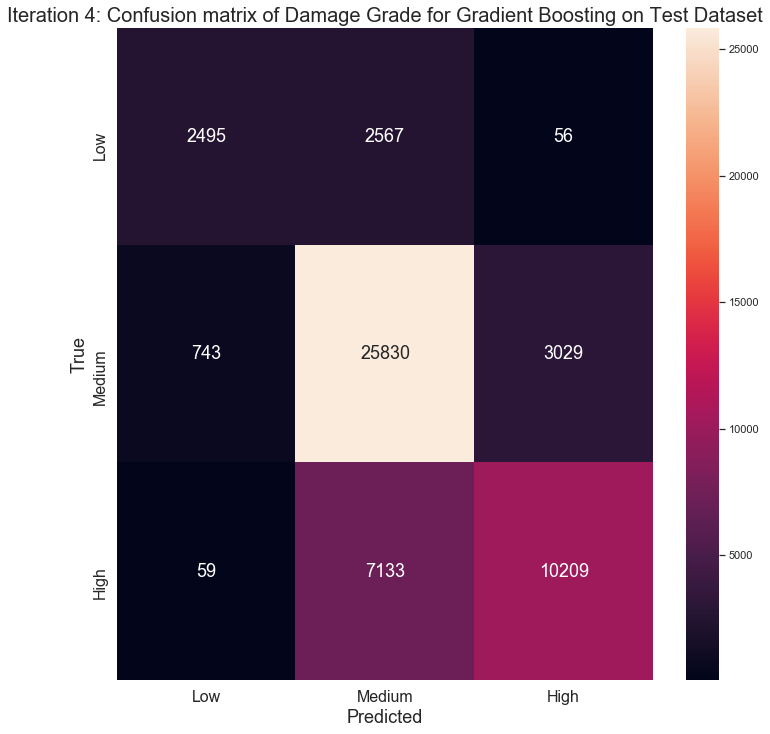

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7393181251319046
Recall Score 			: 0.7393181251319046
Precision Score 		: 0.7435844701906109
F1 Score 			: 0.7307795628265853

True Positive Rate 	: 0.9720
True Negative Rate 	: 0.4929
False Positive Rate 	: 0.5071
False Negative Rate 	: 0.0280





Parameters of Train Model


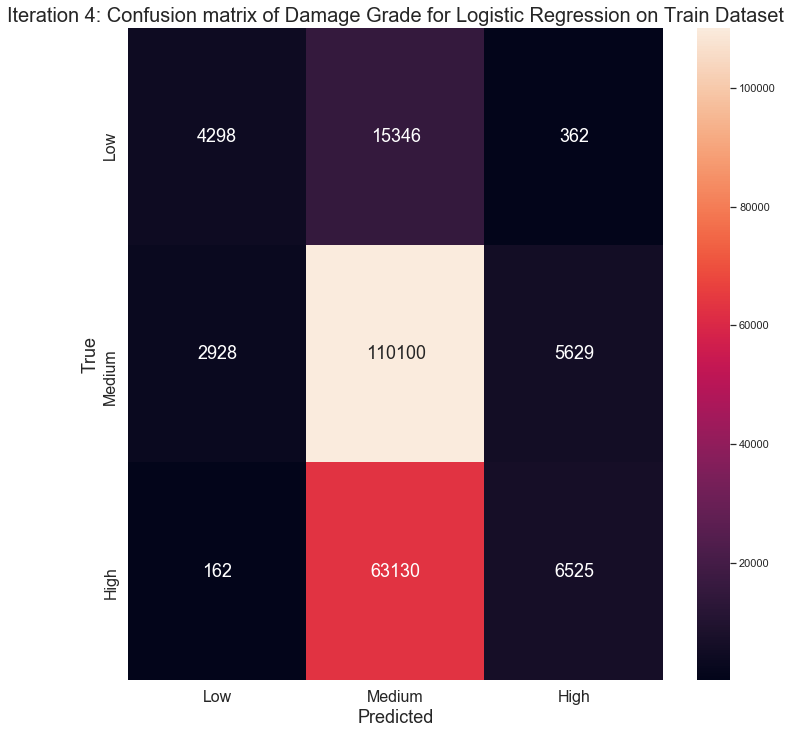

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.5800220644666155
Recall Score 			: 0.5800220644666155
Precision Score 		: 0.5627124289625981
F1 Score 			: 0.49111531769386246

True Positive Rate 	: 0.9741
True Negative Rate 	: 0.2188
False Positive Rate 	: 0.7812
False Negative Rate 	: 0.0259



Parameters of Test Model


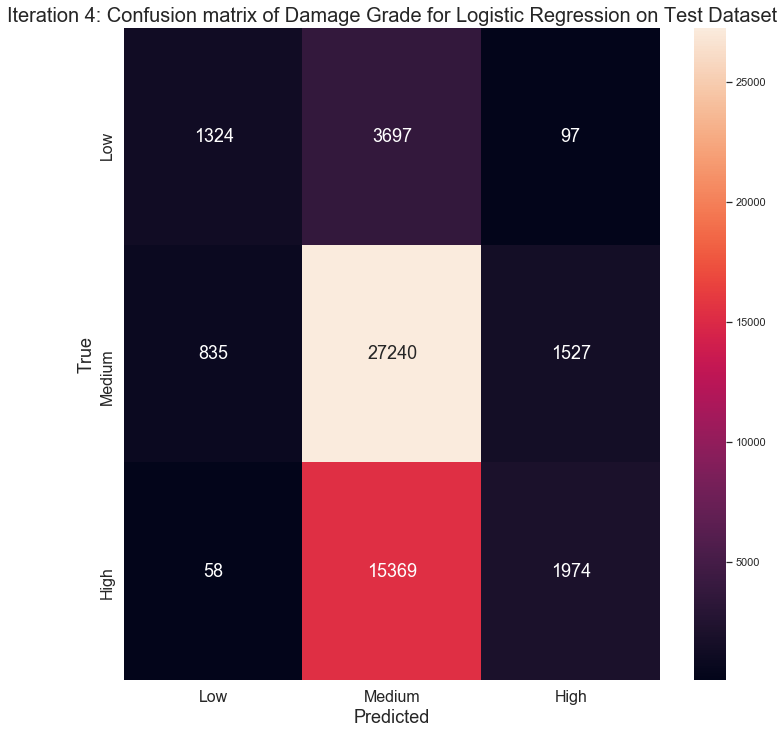

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.5859058728727384
Recall Score 			: 0.5859058728727384
Precision Score 		: 0.5759105263283748
F1 Score 			: 0.5058395962173912

True Positive Rate 	: 0.9703
True Negative Rate 	: 0.2637
False Positive Rate 	: 0.7363
False Negative Rate 	: 0.0297





Parameters of Train Model


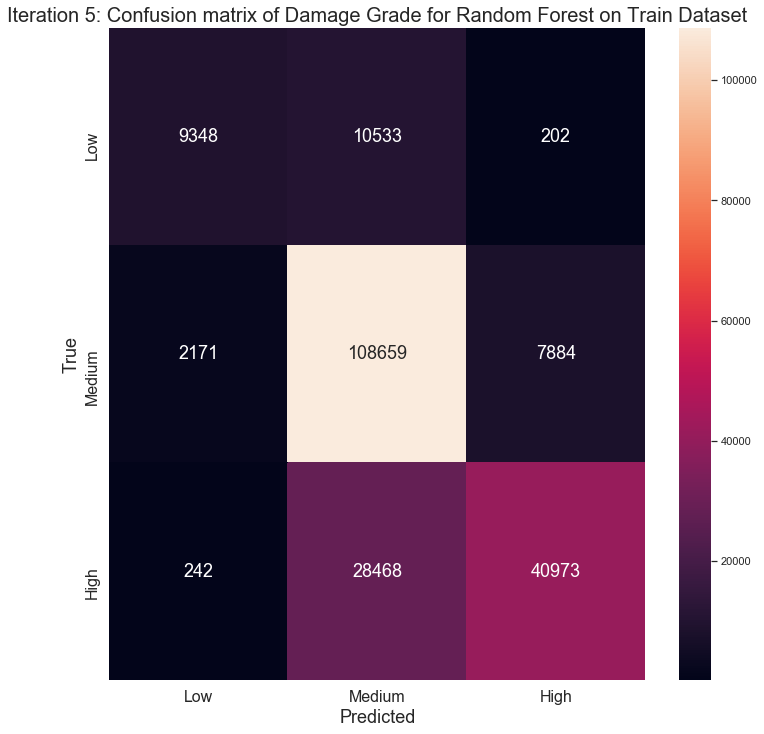

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.762567152724482
Recall Score 			: 0.762567152724482
Precision Score 		: 0.7747443976584095
F1 Score 			: 0.7517836225491437

True Positive Rate 	: 0.9804
True Negative Rate 	: 0.4702
False Positive Rate 	: 0.5298
False Negative Rate 	: 0.0196



Parameters of Test Model


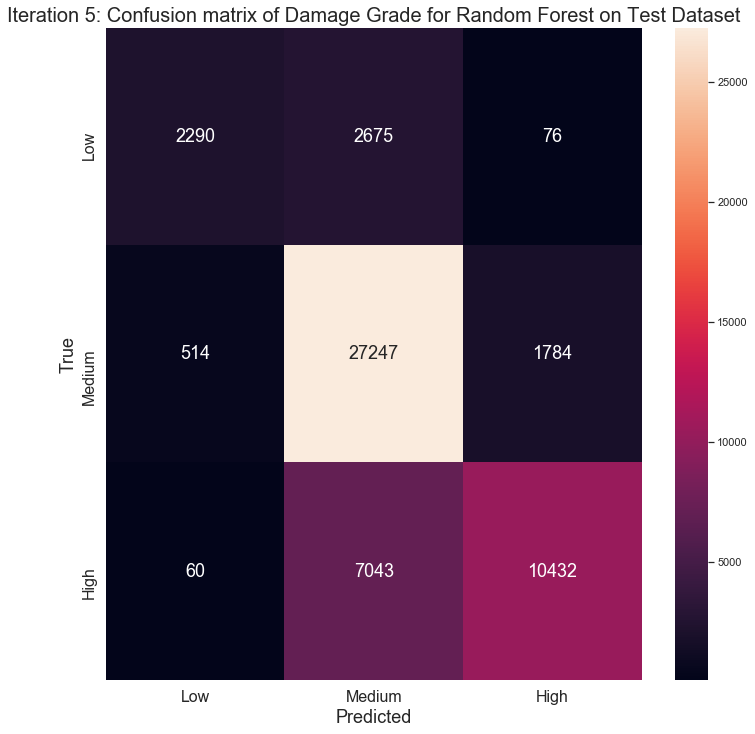

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7668502139252892
Recall Score 			: 0.7668502139252892
Precision Score 		: 0.7806839118269364
F1 Score 			: 0.7558116928294935

True Positive Rate 	: 0.9815
True Negative Rate 	: 0.4612
False Positive Rate 	: 0.5388
False Negative Rate 	: 0.0185





Parameters of Train Model


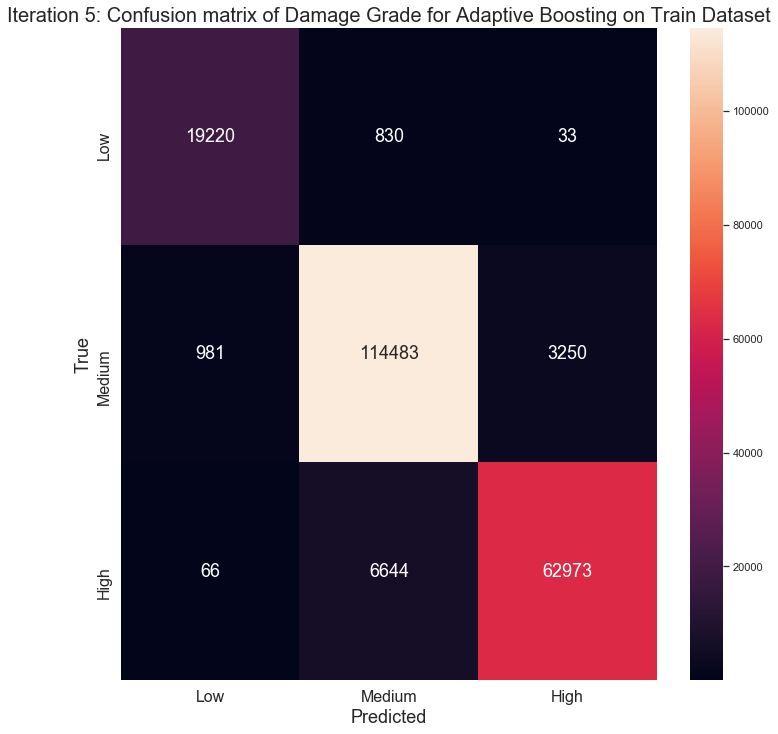

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.9433806600153491
Recall Score 			: 0.9433806600153491
Precision Score 		: 0.9435650447875347
F1 Score 			: 0.9431756301234194

True Positive Rate 	: 0.9915
True Negative Rate 	: 0.9586
False Positive Rate 	: 0.0414
False Negative Rate 	: 0.0085



Parameters of Test Model


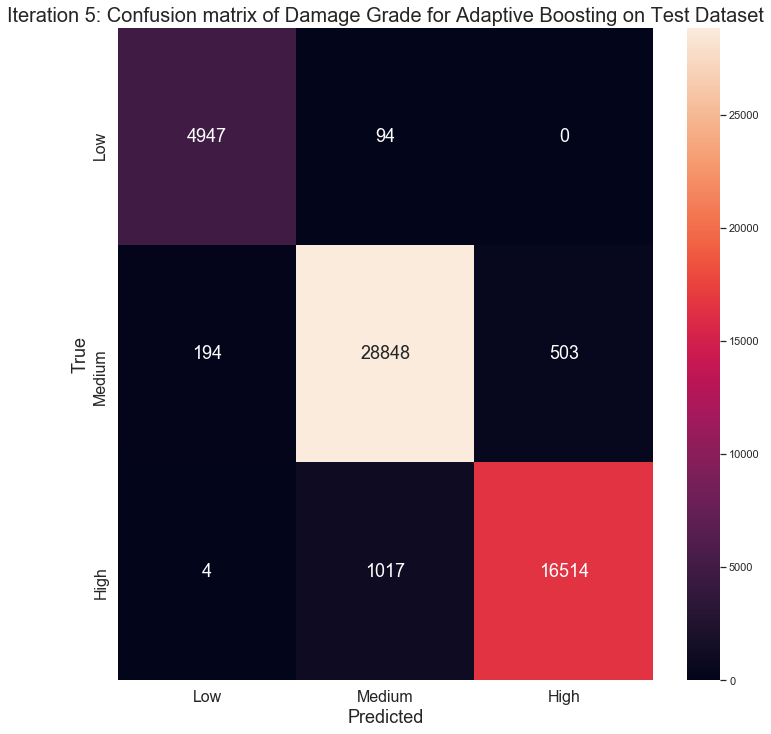

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.9652347422344161
Recall Score 			: 0.9652347422344161
Precision Score 		: 0.9653123255503393
F1 Score 			: 0.9651648364860763

True Positive Rate 	: 0.9933
True Negative Rate 	: 0.9814
False Positive Rate 	: 0.0186
False Negative Rate 	: 0.0067





Parameters of Train Model


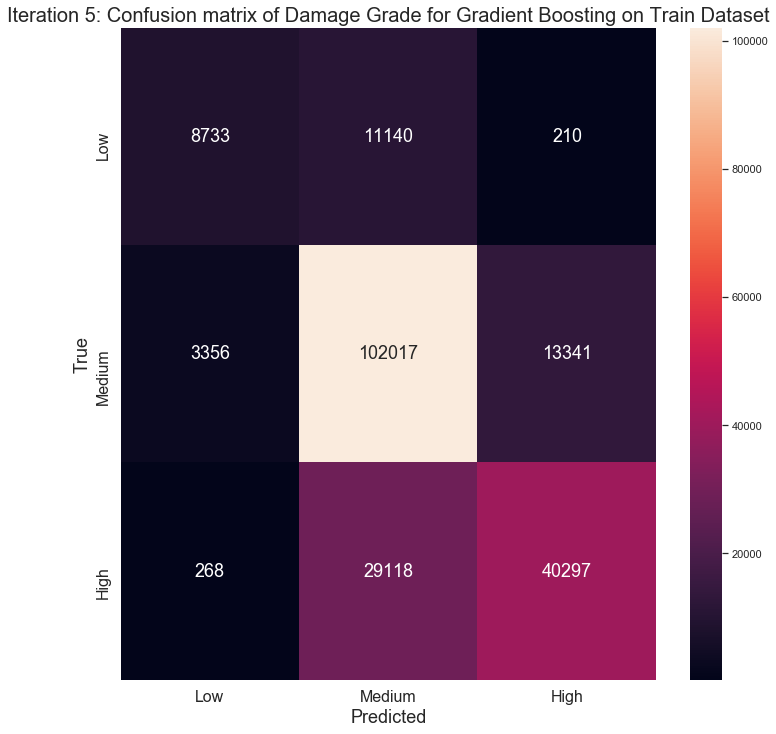

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.7245155410590944
Recall Score 			: 0.7245155410590944
Precision Score 		: 0.7265110951074923
F1 Score 			: 0.7150937008952257

True Positive Rate 	: 0.9682
True Negative Rate 	: 0.4394
False Positive Rate 	: 0.5606
False Negative Rate 	: 0.0318



Parameters of Test Model


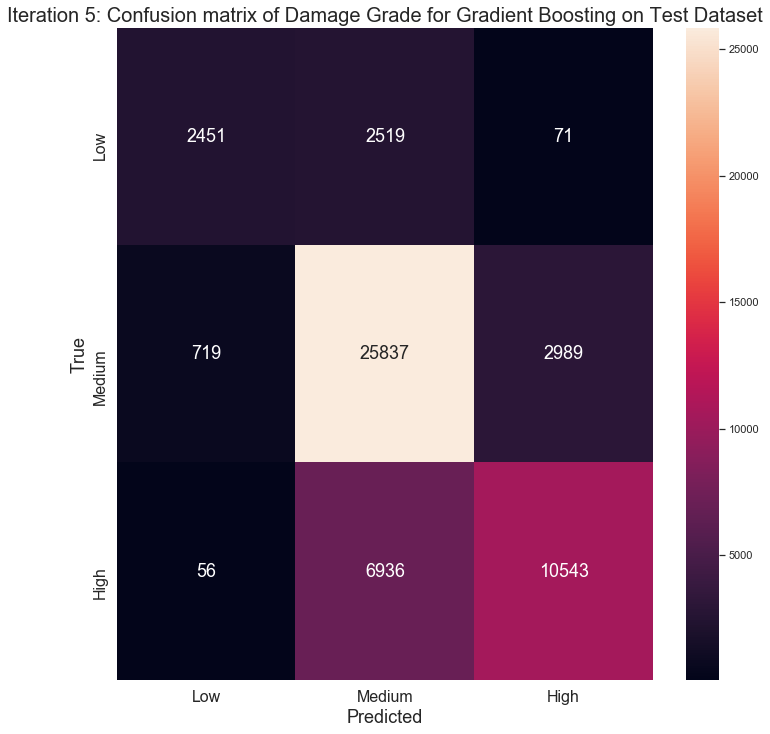

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.7450164041365285
Recall Score 			: 0.7450164041365285
Precision Score 		: 0.7492207231501394
F1 Score 			: 0.7369450674563762

True Positive Rate 	: 0.9729
True Negative Rate 	: 0.4932
False Positive Rate 	: 0.5068
False Negative Rate 	: 0.0271





Parameters of Train Model


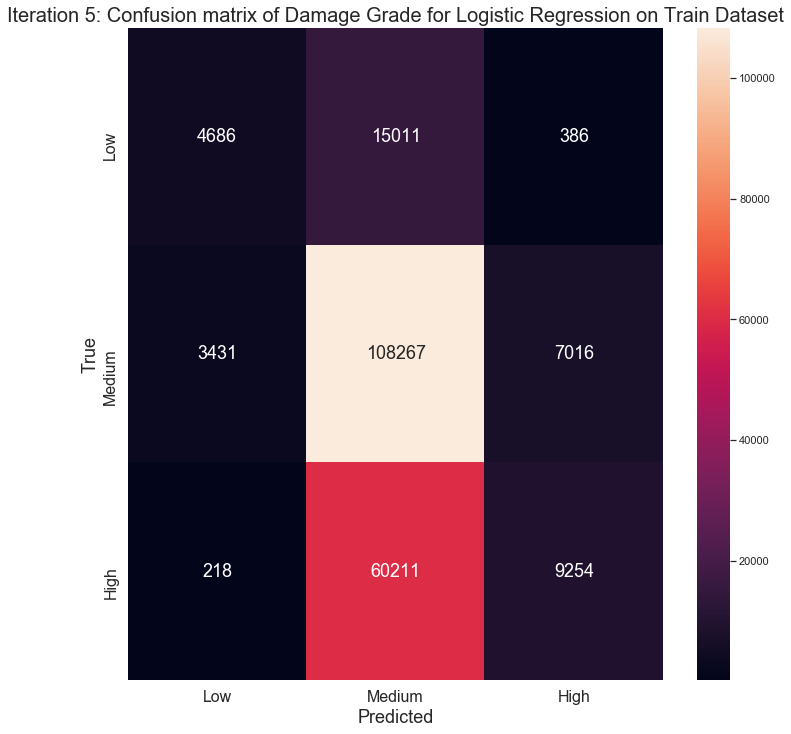

Goodness of Fit of Model 	 Train Dataset
Classification Accuracy 	: 0.5861809286262472
Recall Score 			: 0.5861809286262472
Precision Score 		: 0.5758496457856621
F1 Score 			: 0.5114231661613956

True Positive Rate 	: 0.9693
True Negative Rate 	: 0.2379
False Positive Rate 	: 0.7621
False Negative Rate 	: 0.0307



Parameters of Test Model


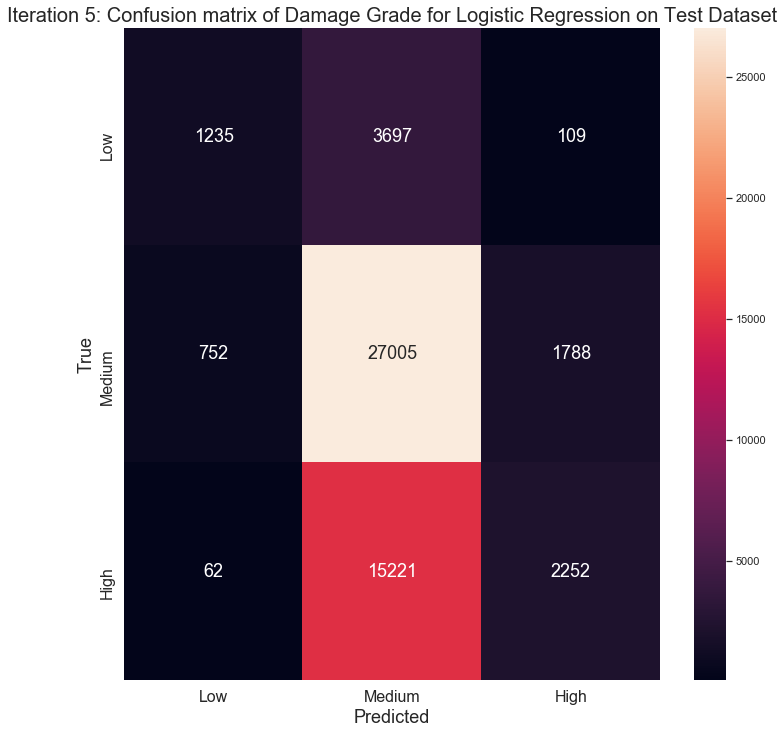

Goodness of Fit of Model 	 Test Dataset
Classification Accuracy 	: 0.5850233111413825
Recall Score 			: 0.5850233111413825
Precision Score 		: 0.5742401963053515
F1 Score 			: 0.5092530813201238

True Positive Rate 	: 0.9729
True Negative Rate 	: 0.2504
False Positive Rate 	: 0.7496
False Negative Rate 	: 0.0271

Wall time: 38min 59s


In [53]:
%%time
iterations = 5
train_accuracy_list, train_f1_score_list, test_accuracy_list, test_f1_score_list = train_test_split_loop(one_hot_df, show_iterations = True, iterations = iterations)

Above is the details given from running the models on 5 iterations. Details such as the confusion matrix is visualized via a heatmap with the relevant actual and predicted values. Information such as Classification Accuracy, F1 Score, Precision and Recall Scores as well as sensitivity and specificity rates are given.


Below are the mean for classification accuracy and F1 score are shown below with +/- 1 standard deviation.

In [54]:
# Prints the mean and standard deviation for classification accuracy and f1 scores from a list of scores.
def model_statistics(accuracy_list, f1_score_list):    
    for (model_name1, accuracy_scores), (model_name2, f1_scores) in zip(accuracy_list.items(), f1_score_list.items()):
        accuracy_scores_array = np.array(accuracy_scores)
        f1_scores_array = np.array(f1_scores)
        display(HTML("<h3>{0}</h3>".format(model_name1)))
        print("Classification Accuracy \t: %0.9f (+/- %0.9f)" % (accuracy_scores_array.mean(), 
                                                                 accuracy_scores_array.std() * 2))
        print("F1 Score \t\t\t: %0.9f (+/- %0.9f)" % (f1_scores_array.mean(), f1_scores_array.std() * 2))

display(HTML("<h2>Mean scores for Train</h2>"))
display(HTML("Total of <b>{0}</b> iterations ran.".format(iterations)))
model_statistics(train_accuracy_list, train_f1_score_list)

display(HTML("</br><h2>Mean scores for Test</h2>"))
display(HTML("Total of <b>{0}</b> iterations ran.".format(iterations)))
model_statistics(test_accuracy_list, test_f1_score_list)

Classification Accuracy 	: 0.763643515 (+/- 0.001323876)
F1 Score 			: 0.753078145 (+/- 0.001547902)


Classification Accuracy 	: 0.943465081 (+/- 0.000506632)
F1 Score 			: 0.943283331 (+/- 0.000506859)


Classification Accuracy 	: 0.725167882 (+/- 0.000955383)
F1 Score 			: 0.715665861 (+/- 0.001072248)


Classification Accuracy 	: 0.582592095 (+/- 0.005344630)
F1 Score 			: 0.501607281 (+/- 0.020234310)


Classification Accuracy 	: 0.763258571 (+/- 0.004032805)
F1 Score 			: 0.751300493 (+/- 0.004939639)


Classification Accuracy 	: 0.963458107 (+/- 0.002941087)
F1 Score 			: 0.963376510 (+/- 0.002964244)


Classification Accuracy 	: 0.742034880 (+/- 0.004130009)
F1 Score 			: 0.733568061 (+/- 0.004269814)


Classification Accuracy 	: 0.584889008 (+/- 0.003143528)
F1 Score 			: 0.509313336 (+/- 0.009254778)


Note: Values above may vary very minutely if we were to run it again. 

In [55]:
from operator import itemgetter

# Create Lollpop chart for visualizing the mean scores of models used.
def create_lollipop_chart(data, chart_title, y_axis_label):
    # Prepare Data
    y_axis = []
    x_axis = []
    combined_data = list(zip([model for model in data], [np.array(data[model]).mean() for model in data]))   
    combined_data = sorted(combined_data, key = itemgetter(1))
    for name, model in combined_data:
        x_axis.append(name)
        y_axis.append(model)
    
    # Draw plot
    fig, ax = plt.subplots(figsize = (12, 6), dpi = 80)
    ax.vlines(x = x_axis, ymin = 0, ymax = y_axis, color = 'firebrick', alpha = 0.7, linewidth = 2)
    ax.scatter(x = x_axis, y = y_axis, s = 75, color = 'firebrick', alpha = 0.7)

    # Title, Label, Ticks and Ylim
    ax.set_title(chart_title, fontdict = {'size': 16})
    ax.set_ylabel(y_axis_label)
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x_axis, fontdict = {'horizontalalignment': 'center', 'size':12})
    ax.set_ylim(0, 1.1)
    ax.set_xlim(-0.75, 3.75)

    # Annotate
    for index, model in enumerate(x_axis):
        ax.text(index, y_axis[index] + .02, s = round(y_axis[index], 2), 
                horizontalalignment = 'center', verticalalignment = 'bottom', fontsize = 14)
    plt.show()

In case it isn't clear which model is the best, Lollipop charts are made for each mean score type for the train and test dataset. 

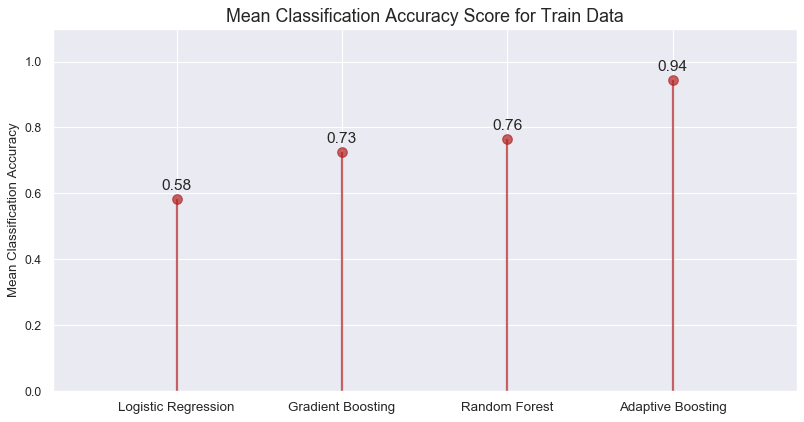

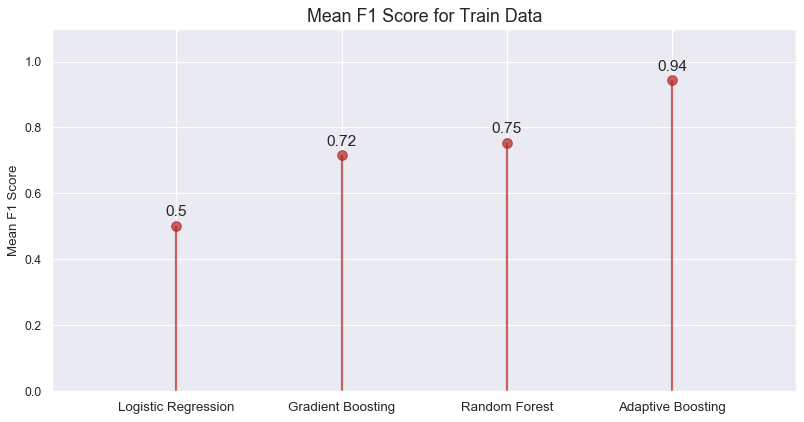

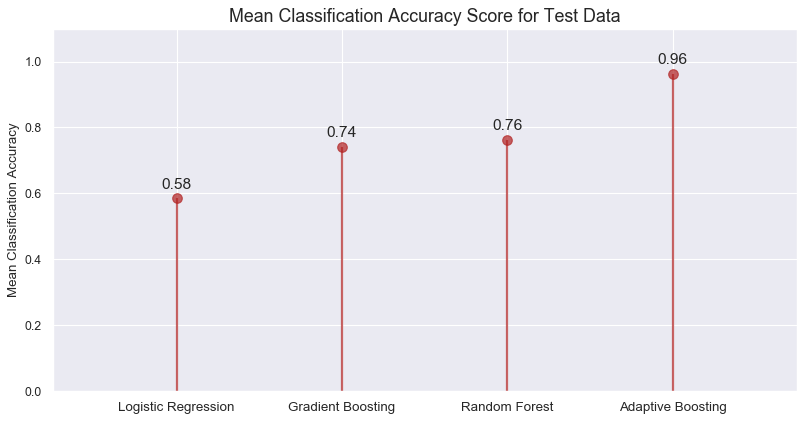

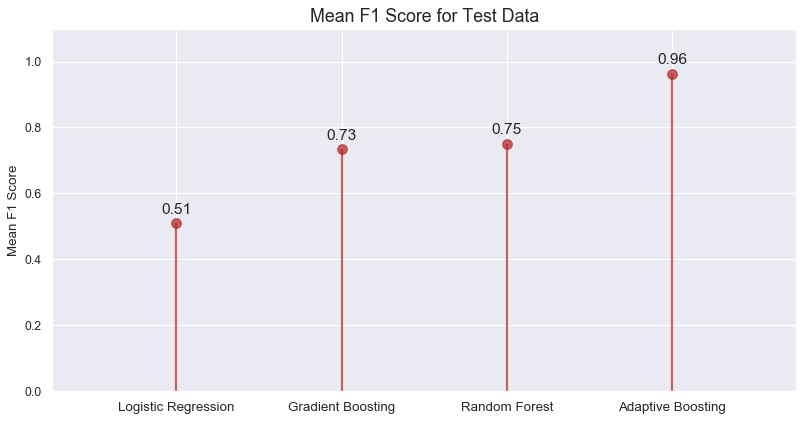

In [56]:
create_lollipop_chart(train_accuracy_list, "Mean Classification Accuracy Score for Train Data", "Mean Classification Accuracy")
create_lollipop_chart(train_f1_score_list, "Mean F1 Score for Train Data", "Mean F1 Score")

create_lollipop_chart(test_accuracy_list, "Mean Classification Accuracy Score for Test Data", "Mean Classification Accuracy")
create_lollipop_chart(test_f1_score_list, "Mean F1 Score for Test Data", "Mean F1 Score")

---
## Conclusion 

By performing one hot encoding, we prepared the earthquake dataset according to our problem. We then explored the dataset using statistics and visualizations to understand our data better. Following this, we used 4 models on the dataset. Using F1 score and classification accuracy as our metrics we have come to a conclusion that adaptive is the best model to predict the damage grade of the buildings

To conclude, we learnt one hot encoding for data preparation for which our model can then act upon. We also learnt the Random Forest, Adaptive Boosting, Gradient Boosting and Logistic Regression Machine Learning Models and the F1 scoring metric.


Among the four models, Adaptive Boosting performed the best with the highest F1 and Classification accuracy scores. An additional point to note is that similar scores were incurred  for both the train and the test data, indicating that overfitting may not be occurring.

Therefore we’ve met our goal by finding the most optimal model for classification and damage prediction with Adaptive Boosting through rigourously comparing the 4 models on the dataset against each other using the F1 score and classification accuracy metric.


Derived from the Random Forest model are the rankings of the top 4 most important features for classication.